# EXPLORATORY DATA ANALYSIS ON TERRORISM DATASET


Dataset : https://www.kaggle.com/itssuru/global-terrorism

## OBJECTIVE

The goal of this project is to perform Exploratory Data Analysis (EDA) on the terrorism dataset
to extract meaningful insights and patterns. By analyzing the dataset, we aim to uncover
trends, identify high-risk regions, understand attack characteristics, and potentially reveal
factors that contribute to terrorist activities.

### IMPORTING ALL THE REQUIRED LIBRARIES

In [62]:
import math
import warnings
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

### OBSERVING THE DATASET

In [63]:
terror = pd.read_csv(r"D:\PROJECTS\CodersCave Dec15-Jan15\Terrorism\globalterrorismdb_0718distt.csv", encoding='latin1')
# We use Encoding='latin1' instead of UTF-8 Encoding since it is of that format.

In [64]:
terror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [65]:
terror.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [66]:
pd.set_option('display.max_columns', None)
print(terror)

             eventid  iyear  imonth  iday approxdate  extended resolution  \
0       197000000001   1970       7     2        NaN         0        NaN   
1       197000000002   1970       0     0        NaN         0        NaN   
2       197001000001   1970       1     0        NaN         0        NaN   
3       197001000002   1970       1     0        NaN         0        NaN   
4       197001000003   1970       1     0        NaN         0        NaN   
...              ...    ...     ...   ...        ...       ...        ...   
181686  201712310022   2017      12    31        NaN         0        NaN   
181687  201712310029   2017      12    31        NaN         0        NaN   
181688  201712310030   2017      12    31        NaN         0        NaN   
181689  201712310031   2017      12    31        NaN         0        NaN   
181690  201712310032   2017      12    31        NaN         0        NaN   

        country         country_txt  region                   region_txt  \

In [67]:
terror.shape

(181691, 135)

### DATA CLEANING

In [68]:
terror.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [69]:
terror.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,2.0,0,The incident occurred near the town of Balcad.,12/31/2017: Assailants opened fire on a Somali...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,4,Military,36.0,Military Checkpoint,Somali National Army (SNA),Checkpoint,182.0,Somalia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Al-Shabaab,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,-99.0,0.0,1.0,10.0,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,Firearms,5.0,Unknown Gun Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,2.0,0.0,0.0,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,Middle East & North Africa,Lattakia,Jableh,35.407278,35.942679,1.0,1,The incident occurred at the Humaymim Airport.,12/31/2017: Assailants launched mortars at the...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,4,Military,27.0,Military Barracks/Base/Headquarters/Checkpost,Russian Air Force,Hmeymim Air Base,167.0,Russia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Muslim extremists,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,-99.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,11.0,"Projectile (rockets, mortars, RPGs, etc.)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mortars were used in the attack.,2.0,0.0,0.0,7.0,0.0,0.0,1,4.0,Unknown,-99.0,Seven military planes were damaged in this att...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,Southeast Asia,Maguindanao,Kubentog,6.900742,124.437908,2.0,0,The incident occurred in the Datu Hoffer distr...,12/31/2017: Assailants set fire to houses in K...,1,1,1,0.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,14,Private Citizens & Property,76.0,House/Apartment/Residence,Not Applicable,Houses,160.0,Philippines,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bangsamoro Islamic Freedom Movement (BIFM),NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,-99.0

From the head and tail information we infer that, there are over 1,81,690 Rows information in the taken Dataset.

### These are the important columns for handling data
- eventid: Unique identifier for each terrorist event.

- iyear: Year of the incident.

- imonth: Month of the incident.

- iday: Day of the incident.

- country_txt: Country where the incident occurred (text format).

- region_txt: Region where the incident occurred (text format).

- provstate: Province or state where the incident occurred.

- city: City where the incident occurred.

- latitude: Latitude of the location where the incident occurred.

- longitude: Longitude of the location where the incident occurred.

- suicide: Indicates whether the attack was a suicide attack (1) or not (0).

- attacktype1_txt: Text description of the primary attack type.

- targtype1_txt: Text description of the target type.

- gname: Name of the terrorist group responsible for the attack.

- motive: Motivation behind the attack.

- nkill: Number of confirmed fatalities.

- nwound: Number of confirmed injuries.

- weaptype1_txt: Text description of the primary weapon type.

These columns provide key information for analyzing global terrorism data, covering details about the incidents, locations, perpetrators, targets, and outcomes. Depending on the specific analysis goals, additional columns may also be relevant.

In [70]:
terror=terror[['eventid','iyear','imonth','iday','city','region_txt','provstate','country_txt',
'latitude','longitude','location','summary','success','suicide','nkill','nwound','attacktype1_txt',
'targtype1_txt','weaptype1_txt','gname','motive','addnotes',]]
terror.head()



,eventid,iyear,imonth,iday,city,region_txt,provstate,country_txt,latitude,longitude,location,summary,success,suicide,nkill,nwound,attacktype1_txt,targtype1_txt,weaptype1_txt,gname,motive,addnotes
0,197000000001,1970,7,2,Santo Domingo,Central America & Caribbean,NaN,Dominican Republic,18.456792,-69.951164,NaN,NaN,1,0,1.0,0.0,Assassination,Private Citizens & Property,Unknown,MANO-D,NaN,NaN
1,197000000002,1970,0,0,Mexico city,North America,Federal,Mexico,19.371887,-99.086624,NaN,NaN,1,0,0.0,0.0,Hostage Taking (Kidnapping),Government (Diplomatic),Unknown,23rd of September Communist League,NaN,NaN
2,197001000001,1970,1,0,Unknown,Southeast Asia,Tarlac,Philippines,15.478598,120.599741,NaN,NaN,1,0,1.0,0.0,Assassination,Journalists & Media,Unknown,Unknown,NaN,NaN
3,197001000002,1970,1,0,Athens,Western Europe,Attica,Greece,37.997490,23.762728,NaN,NaN,1,0,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Explosives,Unknown,NaN,NaN
4,197001000003,1970,1,0,Fukouka,East Asia,Fukouka,Japan,33.580412,130.396361,NaN,NaN,1,0,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Incendiary,Unknown,NaN,NaN


In [71]:
terror.rename(columns={'iyear':'Year',
'imonth':'Month',
'iday':'Day',
'country_txt':'Country',
'city':'City',
'latitude':'Latitude',
'longitude':'Longitude',
'provstate':'State',
'region_txt':'Region',
'attacktype1_txt':'Attack Type',
'target1':'Target',
'nkill':'Killed',
'nwound':'Wounded',
'suicide':'Suicide',
'summary':'Summary',
'gname':'Group',
'targtype1_txt':'Target_type',
'weaptype1_txt':'Weapon_type',
'addnotes':'Add notes',
'motive':'Motive'},
inplace=True)

In [72]:
terror.head()

,eventid,Year,Month,Day,City,Region,State,Country,Latitude,Longitude,location,Summary,success,Suicide,Killed,Wounded,Attack Type,Target_type,Weapon_type,Group,Motive,Add notes
0,197000000001,1970,7,2,Santo Domingo,Central America & Caribbean,NaN,Dominican Republic,18.456792,-69.951164,NaN,NaN,1,0,1.0,0.0,Assassination,Private Citizens & Property,Unknown,MANO-D,NaN,NaN
1,197000000002,1970,0,0,Mexico city,North America,Federal,Mexico,19.371887,-99.086624,NaN,NaN,1,0,0.0,0.0,Hostage Taking (Kidnapping),Government (Diplomatic),Unknown,23rd of September Communist League,NaN,NaN
2,197001000001,1970,1,0,Unknown,Southeast Asia,Tarlac,Philippines,15.478598,120.599741,NaN,NaN,1,0,1.0,0.0,Assassination,Journalists & Media,Unknown,Unknown,NaN,NaN
3,197001000002,1970,1,0,Athens,Western Europe,Attica,Greece,37.997490,23.762728,NaN,NaN,1,0,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Explosives,Unknown,NaN,NaN
4,197001000003,1970,1,0,Fukouka,East Asia,Fukouka,Japan,33.580412,130.396361,NaN,NaN,1,0,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Incendiary,Unknown,NaN,NaN


In [73]:
terror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 22 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   eventid      181691 non-null  int64  
 1   Year         181691 non-null  int64  
 2   Month        181691 non-null  int64  
 3   Day          181691 non-null  int64  
 4   City         181257 non-null  object 
 5   Region       181691 non-null  object 
 6   State        181270 non-null  object 
 7   Country      181691 non-null  object 
 8   Latitude     177135 non-null  float64
 9   Longitude    177134 non-null  float64
 10  location     55495 non-null   object 
 11  Summary      115562 non-null  object 
 12  success      181691 non-null  int64  
 13  Suicide      181691 non-null  int64  
 14  Killed       171378 non-null  float64
 15  Wounded      165380 non-null  float64
 16  Attack Type  181691 non-null  object 
 17  Target_type  181691 non-null  object 
 18  Weapon_type  181691 non-

In [74]:
terror.isnull().sum()

eventid             0
Year                0
Month               0
Day                 0
City              434
Region              0
State             421
Country             0
Latitude         4556
Longitude        4557
location       126196
Summary         66129
success             0
Suicide             0
Killed          10313
Wounded         16311
Attack Type         0
Target_type         0
Weapon_type         0
Group               0
Motive         131130
Add notes      153402
dtype: int64

In [75]:
terror.shape

(181691, 22)

In [76]:
terror['Killed']=terror['Killed'].fillna(0)
terror['Wounded']=terror['Wounded'].fillna(0)

terror['Casualty ']=terror['Killed']+terror['Wounded']
terror.head()

,eventid,Year,Month,Day,City,Region,State,Country,Latitude,Longitude,location,Summary,success,Suicide,Killed,Wounded,Attack Type,Target_type,Weapon_type,Group,Motive,Add notes,Casualty
0,197000000001,1970,7,2,Santo Domingo,Central America & Caribbean,NaN,Dominican Republic,18.456792,-69.951164,NaN,NaN,1,0,1.0,0.0,Assassination,Private Citizens & Property,Unknown,MANO-D,NaN,NaN,1.0
1,197000000002,1970,0,0,Mexico city,North America,Federal,Mexico,19.371887,-99.086624,NaN,NaN,1,0,0.0,0.0,Hostage Taking (Kidnapping),Government (Diplomatic),Unknown,23rd of September Communist League,NaN,NaN,0.0
2,197001000001,1970,1,0,Unknown,Southeast Asia,Tarlac,Philippines,15.478598,120.599741,NaN,NaN,1,0,1.0,0.0,Assassination,Journalists & Media,Unknown,Unknown,NaN,NaN,1.0
3,197001000002,1970,1,0,Athens,Western Europe,Attica,Greece,37.997490,23.762728,NaN,NaN,1,0,0.0,0.0,Bombing/Explosion,Government (Diplomatic),Explosives,Unknown,NaN,NaN,0.0
4,197001000003,1970,1,0,Fukouka,East Asia,Fukouka,Japan,33.580412,130.396361,NaN,NaN,1,0,0.0,0.0,Facility/Infrastructure Attack,Government (Diplomatic),Incendiary,Unknown,NaN,NaN,0.0


In [77]:
terror.describe()

,eventid,Year,Month,Day,Latitude,Longitude,success,Suicide,Killed,Wounded,Casualty
count,1.816910e+05,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,0.889598,0.036507,2.266860,2.883296,5.150156
std,1.325957e+09,13.259430,3.388303,8.814045,18.569242,2.047790e+05,0.313391,0.187549,11.227057,34.309747,40.555416
min,1.970000e+11,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,1.000000,0.000000,0.000000,0.000000,0.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,1.000000,0.000000,0.000000,0.000000,1.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,1.000000,0.000000,2.000000,2.000000,4.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1.000000,1.000000,1570.000000,8191.000000,9574.000000


#### From Cleaning the Data we infer that:

- The dataset is collection of terrorism during 1970 to 2017

- Maximum number of People Killed =  1570

- Maximum number of People Wounded = 8191

- Maximum number of Casualities = 9574

### VISUALIZING DATA


In [78]:
print("Country with the most attacks:",terror['Country'].value_counts().idxmax())
print("City with the most attacks:",terror['City'].value_counts().index[1]) #as first entry is 'unknown'
print("Region with the most attacks:",terror['Region'].value_counts().idxmax())
print("Year with the most attacks:",terror['Year'].value_counts().idxmax())
print("Month with the most attacks:",terror['Month'].value_counts().idxmax())
print("Group with the most attacks:",terror['Group'].value_counts().index[1])   #as first entry is 'unknown'
print("Most Attack Types:",terror['Attack Type'].value_counts().idxmax())

Country with the most attacks: Iraq
City with the most attacks: Baghdad
Region with the most attacks: Middle East & North Africa
Year with the most attacks: 2014
Month with the most attacks: 5
Group with the most attacks: Taliban
Most Attack Types: Bombing/Explosion


### *1. Temporal Analysis: Year-wise Description on Terrorism Attacks and Casualty*
- Analyze the distribution of incidents across years, months, and days.
- Analysing the data by attacks during every Year.

#### Analyzing Data by ATTACKS every Year

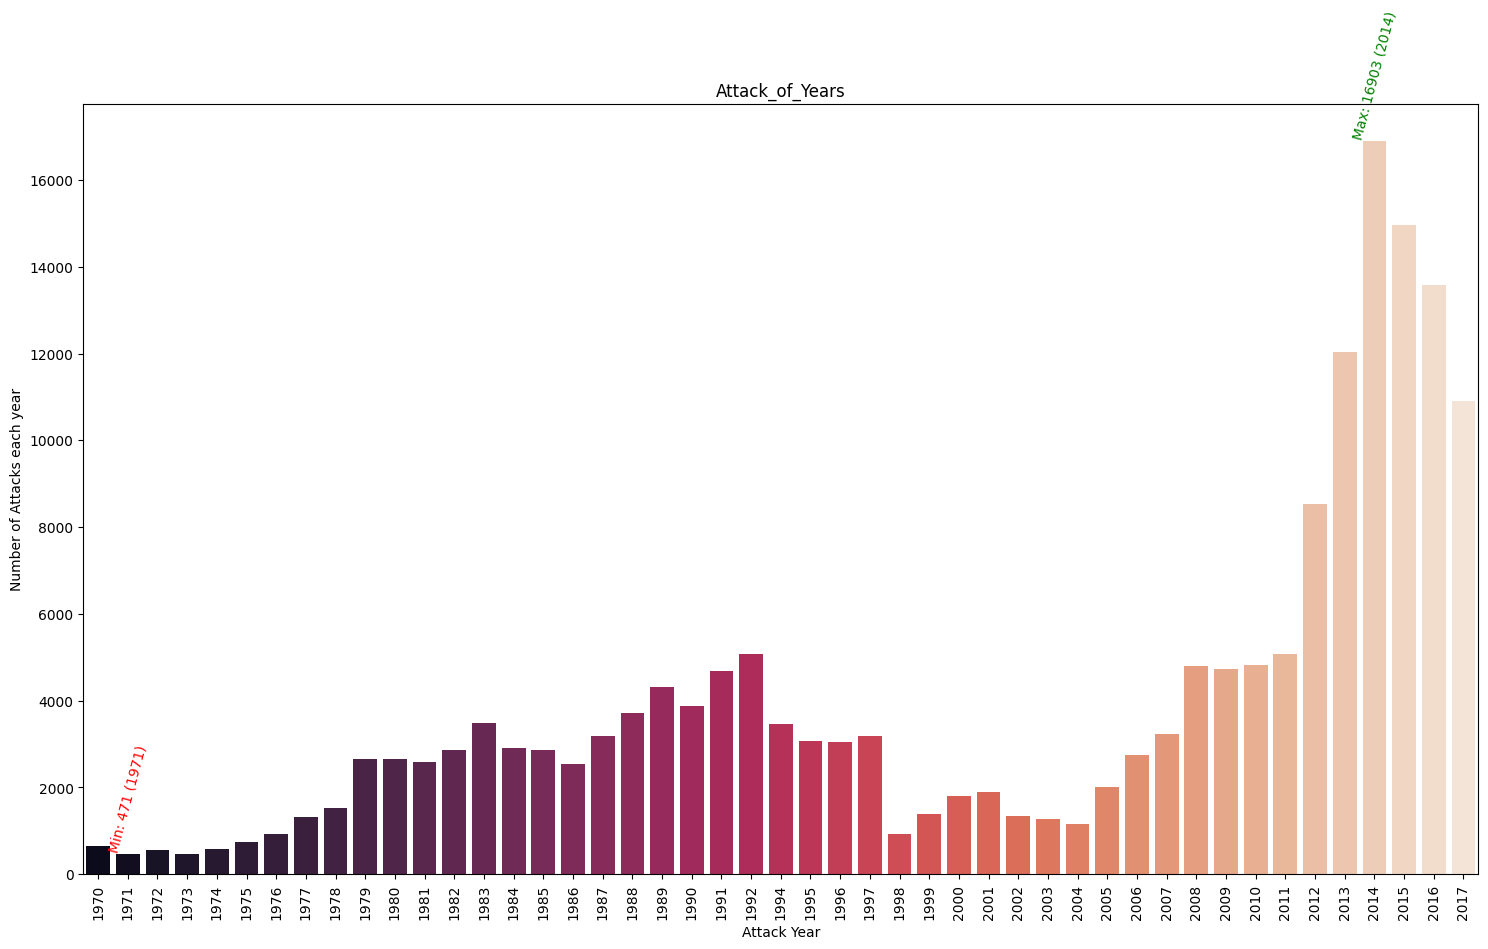

Min Attacks: 1971 - 471 attacks
Max Attacks: 2014 - 16903 attacks


In [79]:
x_year = terror['Year'].unique()
y_count_years = terror['Year'].value_counts(dropna=False).sort_index()

# Get min and max values
min_value = y_count_years.min()
max_value = y_count_years.max()

# Find the corresponding years for min and max
year_min = y_count_years.idxmin()
year_max = y_count_years.idxmax()

plt.figure(figsize=(18, 10))
sns.barplot(x=x_year, y=y_count_years, palette='rocket')

plt.xticks(rotation=90)
plt.xlabel('Attack Year')
plt.ylabel('Number of Attacks each year')
plt.title('Attack_of_Years')

# Display min and max values on the plot
plt.text(x_year.searchsorted(year_min), min_value, f'Min: {min_value} ({year_min})', ha='center', va='bottom', color='red', rotation=75)
plt.text(x_year.searchsorted(year_max), max_value, f'Max: {max_value} ({year_max})', ha='center', va='bottom', color='green', rotation=75)

plt.show()

# Print min and max values from the graph plot
print(f"Min Attacks: {year_min} - {min_value} attacks")
print(f"Max Attacks: {year_max} - {max_value} attacks")

#### Analyzing how many people KILLED every Year

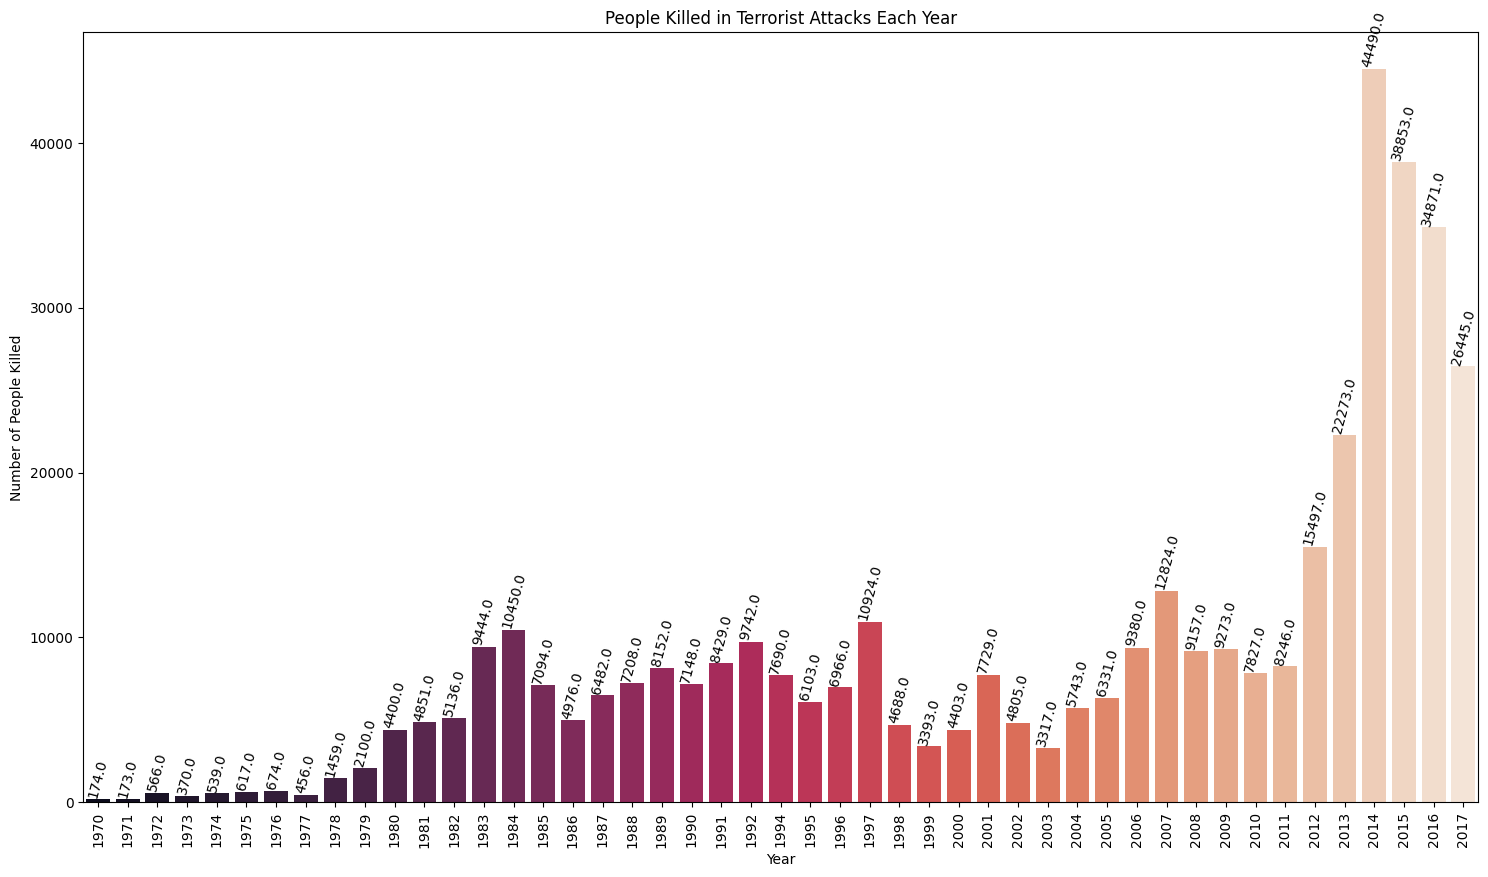

Min People Killed: 1971.0 - 173.0 people killed
Max People Killed: 2014.0 - 44490.0 people killed


In [80]:
year_killed=terror[["Year","Killed"]].groupby("Year").sum()
year_killed.head()

# Filter data for the year range from 1970 to 2017
terror_filtered = terror[(terror['Year'] >= 1970) & (terror['Year'] <= 2017)]

# Group by 'Year' and sum the number of casualties in each year
year_killed = terror_filtered.groupby('Year')['Killed'].sum().reset_index()

plt.figure(figsize=(18, 10))
sns.barplot(x='Year', y='Killed', data=year_killed, palette='rocket')

plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Number of People Killed')
plt.title('People Killed in Terrorist Attacks Each Year')

# Display values on the plot
for index, value in enumerate(year_killed['Killed']):
    plt.text(index, value, str(value), ha='center', va='bottom', color='black', rotation=75)

plt.show()


# Get min and max values
min_killed_value = year_killed['Killed'].min()
max_killed_value = year_killed['Killed'].max()

# Find the corresponding years for min and max
year_min_killed = year_killed.loc[year_killed['Killed'].idxmin()]['Year']
year_max_killed = year_killed.loc[year_killed['Killed'].idxmax()]['Year']

# Print min and max values from the graph plot
print(f"Min People Killed: {year_min_killed} - {min_killed_value} people killed")
print(f"Max People Killed: {year_max_killed} - {max_killed_value} people killed")


#### Analyzing how many people were WOUNDED every Year

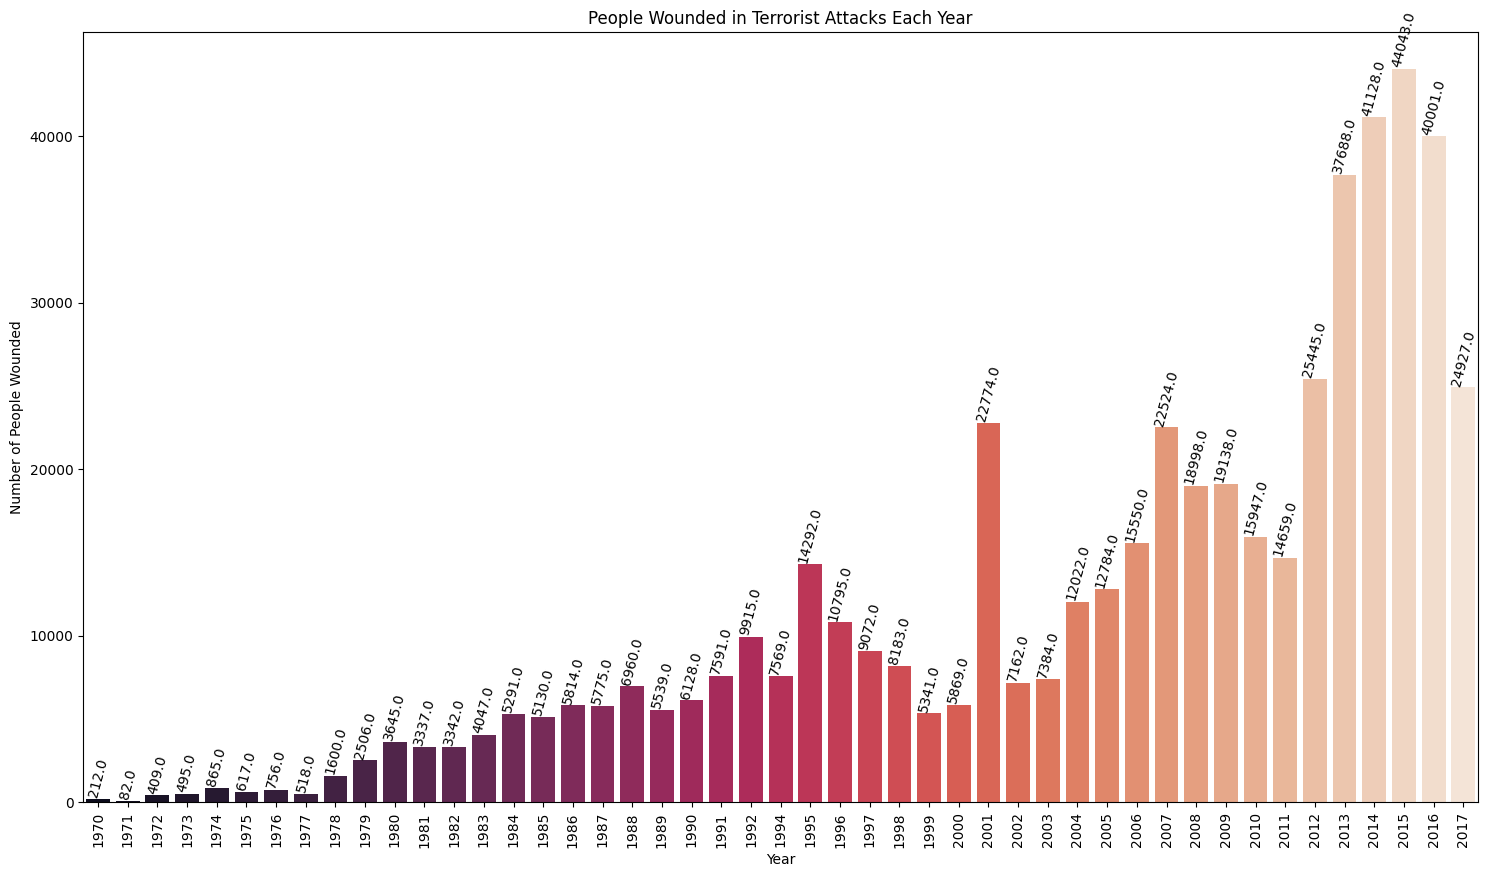

Min People Wounded: 1971.0 - 82.0 people wounded
Max People Wounded: 2015.0 - 44043.0 people wounded


In [81]:
year_wounded=terror[["Year","Wounded"]].groupby("Year").sum()
year_wounded.head()

# Filter data for the year range from 1970 to 2017
terror_filtered = terror[(terror['Year'] >= 1970) & (terror['Year'] <= 2017)]

# Group by 'Year' and sum the number of casualties in each year
year_killed = terror_filtered.groupby('Year')['Wounded'].sum().reset_index()

plt.figure(figsize=(18, 10))
sns.barplot(x='Year', y='Wounded', data=year_killed, palette='rocket')

plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Number of People Wounded')
plt.title('People Wounded in Terrorist Attacks Each Year')

# Display values on the plot
for index, value in enumerate(year_wounded['Wounded']):
    plt.text(index, value, str(value), ha='center', va='bottom', color='black', rotation=75)

plt.show()


# Get min and max values
min_wounded_value = year_killed['Wounded'].min()
max_wounded_value = year_killed['Wounded'].max()

# Find the corresponding years for min and max
year_min_wounded = year_killed.loc[year_killed['Wounded'].idxmin()]['Year']
year_max_wounded = year_killed.loc[year_killed['Wounded'].idxmax()]['Year']

# Print min and max values from the graph plot
print(f"Min People Wounded: {year_min_wounded} - {min_wounded_value} people wounded")
print(f"Max People Wounded: {year_max_wounded} - {max_wounded_value} people wounded")


#### Analyzing Data by CASUALTY every Year

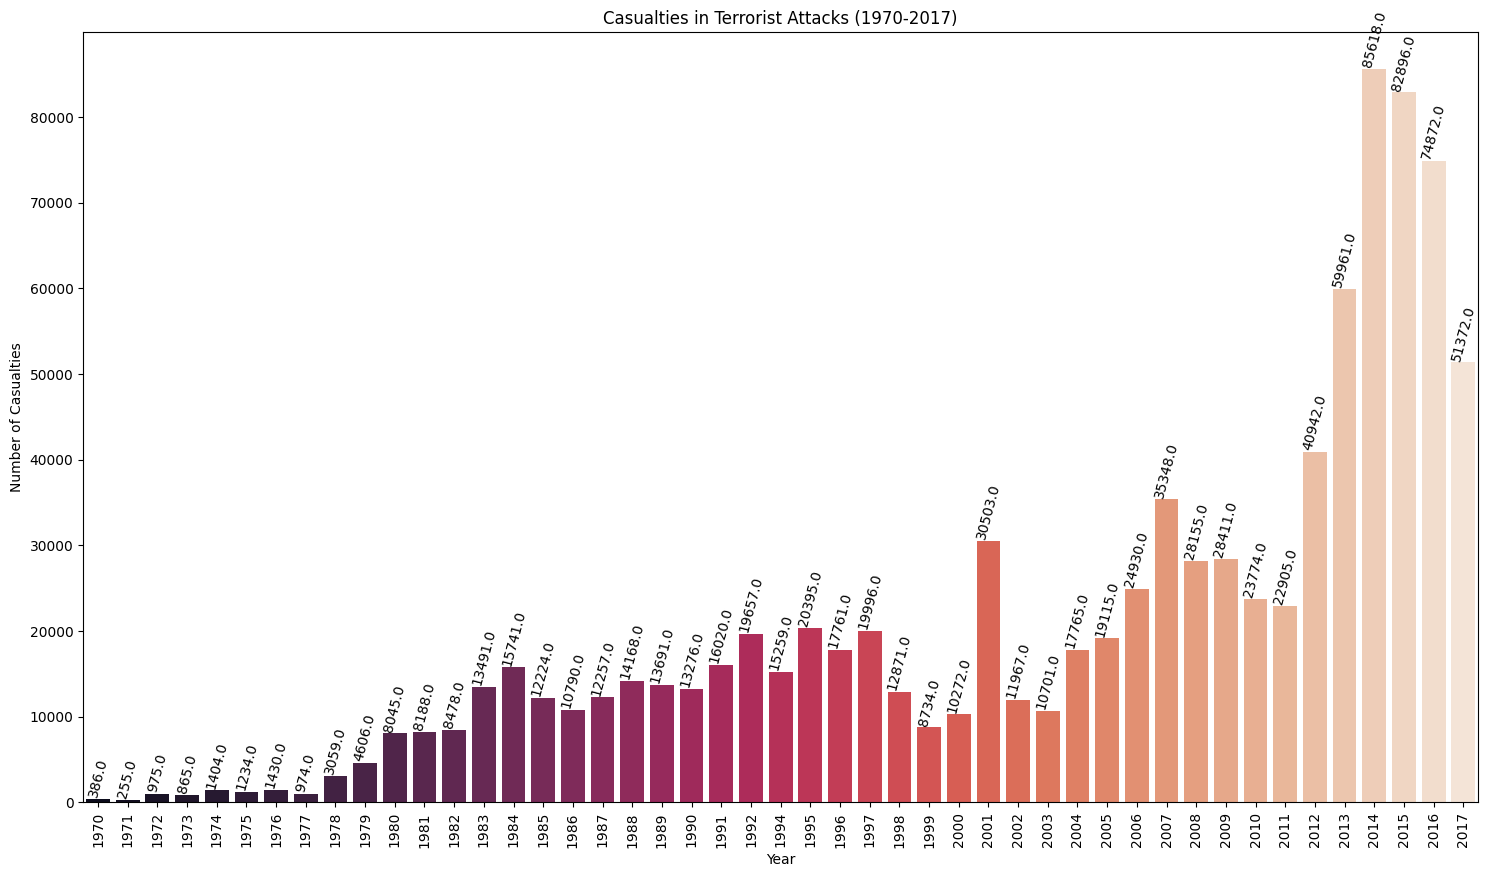

Min Casualties: 1971.0 - 255.0 casualties
Max Casualties: 2014.0 - 85618.0 casualties


In [82]:

# Calculate 'Casualty' as the sum of 'Killed' and 'Wounded'
terror['Casualty'] = terror['Killed'] + terror['Wounded']

# Filter data for the year range from 1970 to 2017
terror_filtered = terror[(terror['Year'] >= 1970) & (terror['Year'] <= 2017)]

# Group by 'Year' and sum the number of casualties in each year
casualties_by_year = terror_filtered.groupby('Year')['Casualty'].sum().reset_index()

# Create a bar plot
plt.figure(figsize=(18, 10))
sns.barplot(x='Year', y='Casualty', data=casualties_by_year, palette='rocket')

plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Number of Casualties')
plt.title('Casualties in Terrorist Attacks (1970-2017)')

# Display values on the plot
for index, value in enumerate(casualties_by_year['Casualty']):
    plt.text(index, value, str(value), ha='center', va='bottom', color='black', rotation=75)

# # Get min and max values with corresponding years
# min_casualty_year = casualties_by_year.loc[casualties_by_year['Casualty'].idxmin()]
# max_casualty_year = casualties_by_year.loc[casualties_by_year['Casualty'].idxmax()]
# # Display only min and max values on the plot at 90-degree angle
# plt.text(min_casualty_year['Year'], min_casualty_year['Casualty'], f'Min: {min_casualty_year["Casualty"]}', ha='center', color='red', rotation=90)
# plt.text(max_casualty_year['Year'], max_casualty_year['Casualty'], f'Max: {max_casualty_year["Casualty"]}', ha='center', color='green', rotation=90)

plt.show()

# Get min and max values
min_casualty_value = casualties_by_year['Casualty'].min()
max_casualty_value = casualties_by_year['Casualty'].max()

# Find the corresponding years for min and max
year_min_casualty = casualties_by_year.loc[casualties_by_year['Casualty'].idxmin()]['Year']
year_max_casualty = casualties_by_year.loc[casualties_by_year['Casualty'].idxmax()]['Year']

# Print min and max values from the graph plot
print(f"Min Casualties: {year_min_casualty} - {min_casualty_value} casualties")
print(f"Max Casualties: {year_max_casualty} - {max_casualty_value} casualties")



### *2. Geospatial Distribution: Region-wise Analysis*

- Identify hotspots or regions with a high concentration of incidents.

#### DIstribution of terrorists attacks in each REGION:

In [83]:
reg_year=pd.crosstab(terror.Year,terror.Region)
reg_year.head()

Region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,,,
1970,1,7,0,2,12,28,472,65,1,10,3,50
1971,1,5,0,1,5,55,247,24,0,6,2,125
1972,8,3,0,0,1,53,73,33,1,16,4,376
1973,1,6,0,2,1,19,64,83,1,2,4,290
1974,1,11,0,4,2,42,111,81,2,3,7,317


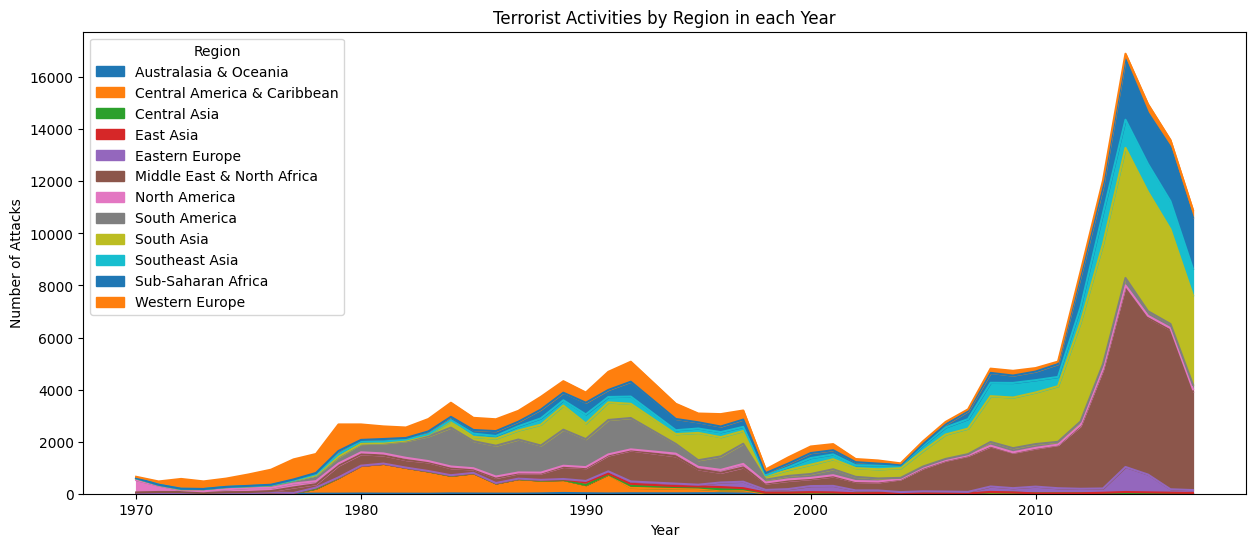

In [84]:
# plt.figure(figsize=(20,12))
# reg_year.plot(kind='area', stacked=False, colormap='viridis', alpha=0.5)

# plt.xlabel('Year')
# plt.ylabel('Number of Attacks')
# plt.title('Area Plot of Terrorist Attacks by Region Over Years')

# plt.show()

pd.crosstab(terror.Year, terror.Region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

#### Total count of terrorists attacks in each REGION:

In [85]:
# Group by 'Country' and count the number of attacks in each country
attacks_by_country = terror['Country'].value_counts().reset_index()
attacks_by_country.columns = ['Country', 'Number of Attacks']

# Sort the DataFrame by the number of attacks in descending order
sorted_countries = attacks_by_country.sort_values(by='Number of Attacks', ascending=False)

# Print the top 50 countries
print(sorted_countries.head(15))

           Country  Number of Attacks
0             Iraq              24636
1         Pakistan              14368
2      Afghanistan              12731
3            India              11960
4         Colombia               8306
5      Philippines               6908
6             Peru               6096
7      El Salvador               5320
8   United Kingdom               5235
9           Turkey               4292
10         Somalia               4142
11         Nigeria               3907
12        Thailand               3849
13           Yemen               3347
14           Spain               3249


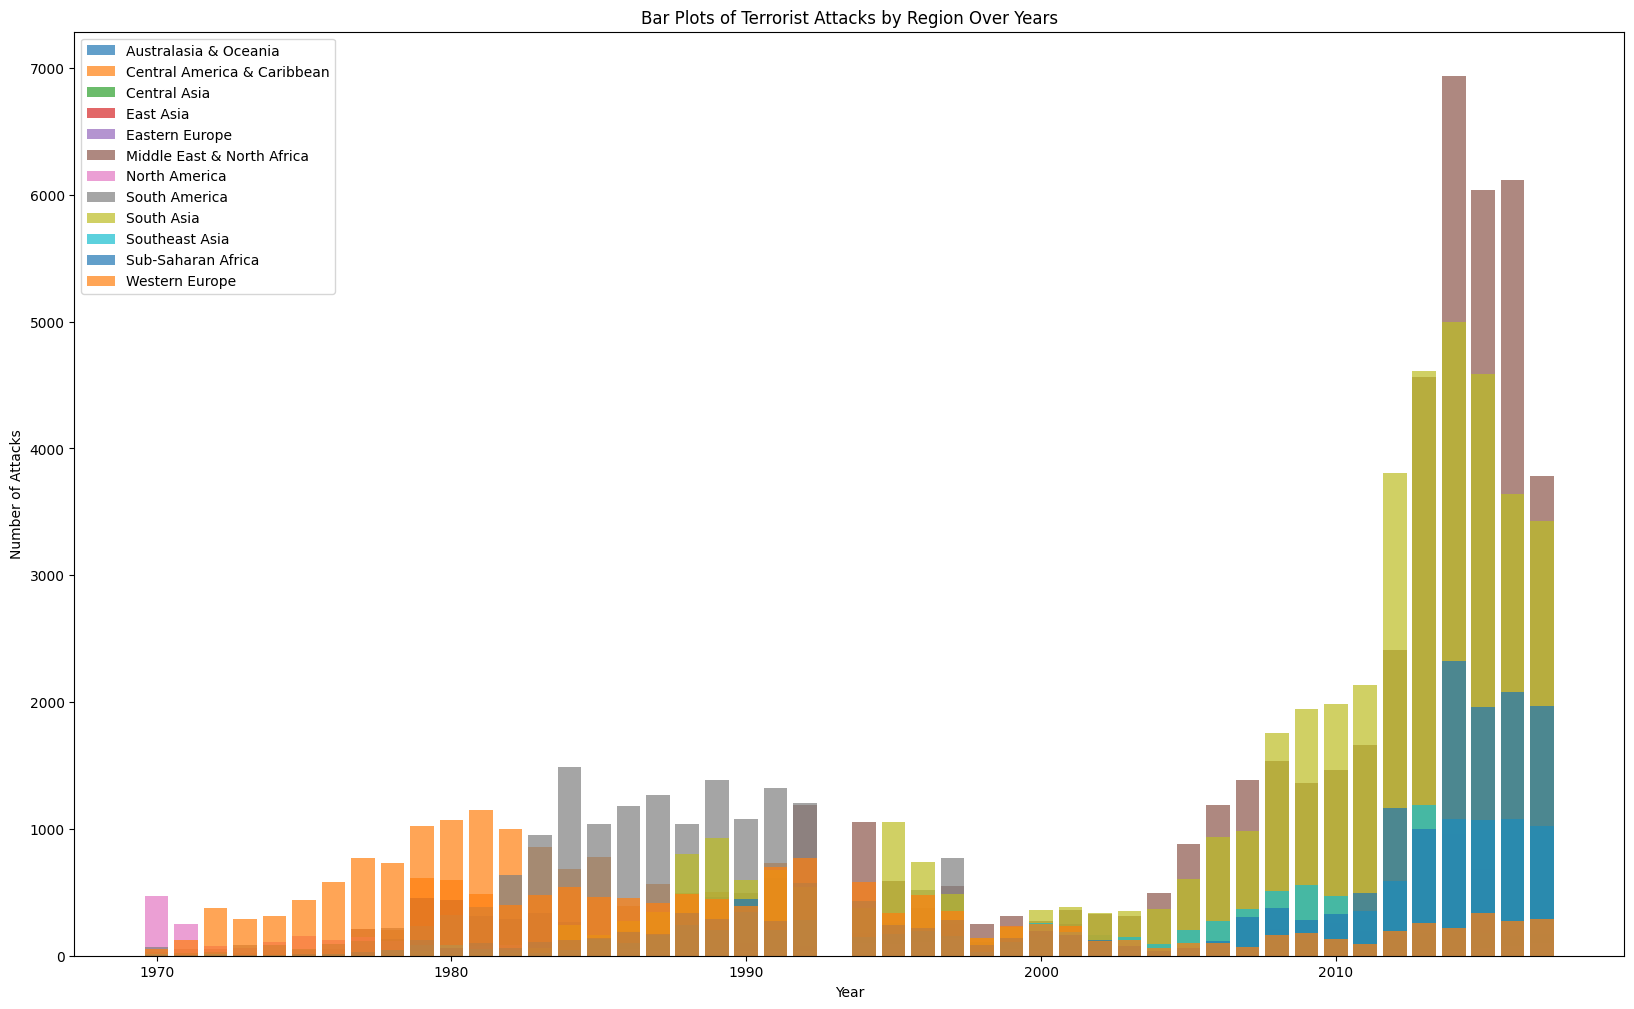

In [86]:
reg_year = pd.crosstab(terror['Year'], terror['Region'])

plt.figure(figsize=(20, 12))

# Iterate through each region and plot a bar for each
for region in reg_year.columns:
    plt.bar(reg_year.index, reg_year[region], label=region, alpha=0.7)

plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.title('Bar Plots of Terrorist Attacks by Region Over Years')
plt.legend()
plt.show()

#### Region-wise HOTSPOTS

In [87]:

# Calculate 'Casualty' as the sum of 'Killed' and 'Wounded'
terror['Casualty'] = terror['Killed'] + terror['Wounded']

# Filter data for the selected regions
selected_regions = ['Australasia & Oceania','Central America & Caribbean','Central Asia	East Asia','Eastern Europe','Middle East & North Africa	North America','South America','South Asia','Southeast Asia','Sub-Saharan Africa','Western Europe']
terror_selected = terror[terror['Region'].isin(selected_regions)]

# Group by 'Region' and sum the number of attacks, people killed, people wounded, and casualties
region_stats = terror_selected.groupby('Region').agg({
    'Year': 'count',
    'Killed': 'sum',
    'Wounded': 'sum',
    'Casualty': 'sum'
}).reset_index()



#### Region-wise Yearly ATTACKS analysis

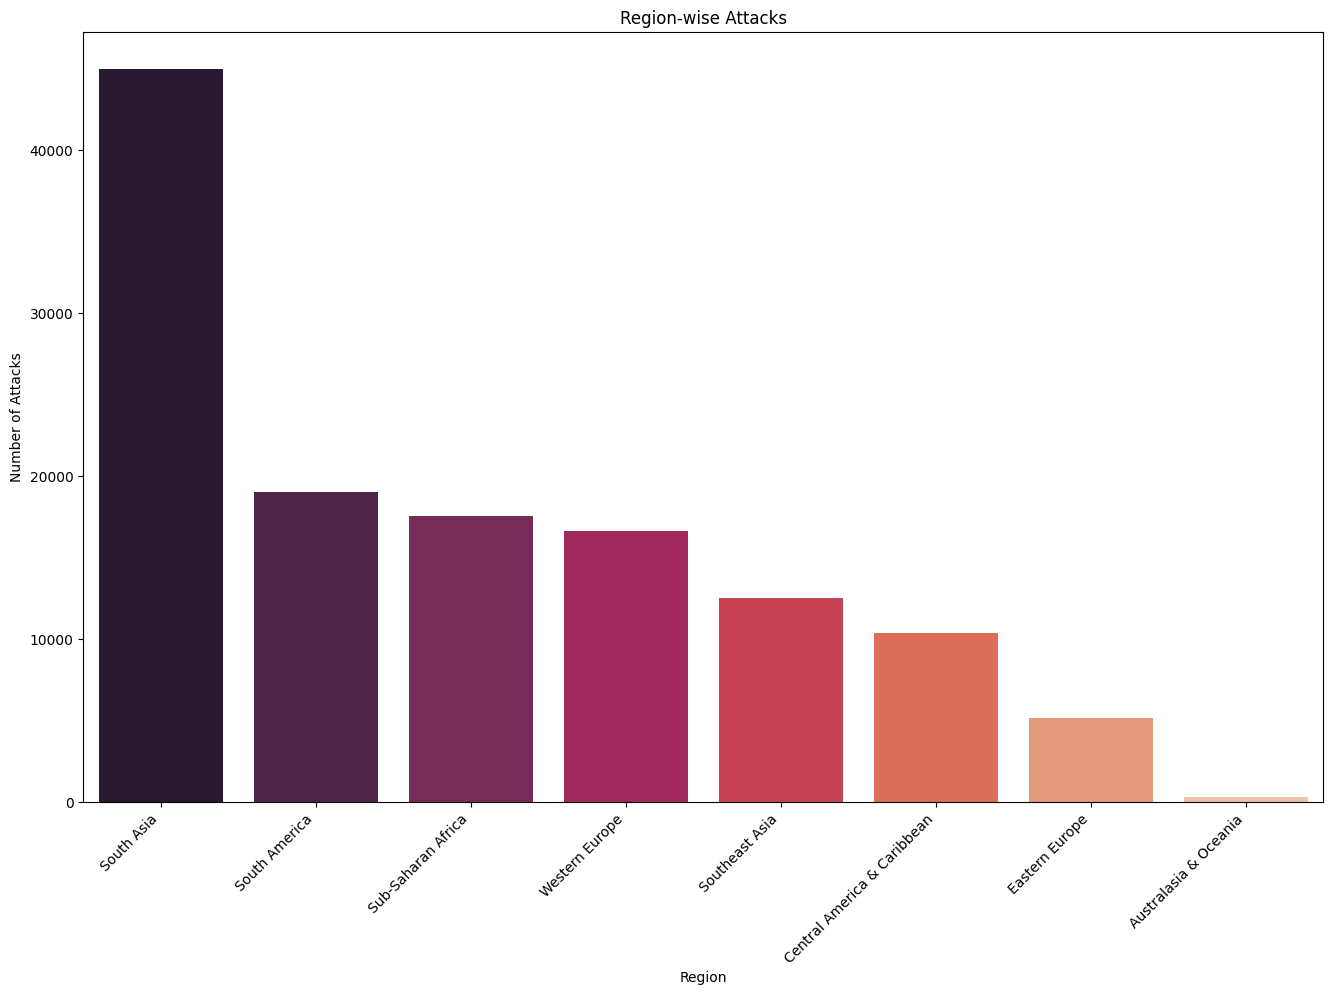

Region-wise Attacks:
Min Attacks: Australasia & Oceania - 282 attacks
Max Attacks: South Asia - 44974 attacks



In [88]:
# Plotting region-wise attacks
plt.figure(figsize=(16, 10))
sns.barplot(x='Region', y='Year', data=region_stats.sort_values(by='Year', ascending=False), palette='rocket')
plt.title('Region-wise Attacks')
plt.xlabel('Region')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45, ha='right')
plt.show()


# Region-wise Attacks
min_attacks_region = region_stats.loc[region_stats['Year'].idxmin()]
max_attacks_region = region_stats.loc[region_stats['Year'].idxmax()]
print(f"Region-wise Attacks:")
print(f"Min Attacks: {min_attacks_region['Region']} - {min_attacks_region['Year']} attacks")
print(f"Max Attacks: {max_attacks_region['Region']} - {max_attacks_region['Year']} attacks\n")



#### Region-wise People KILLED

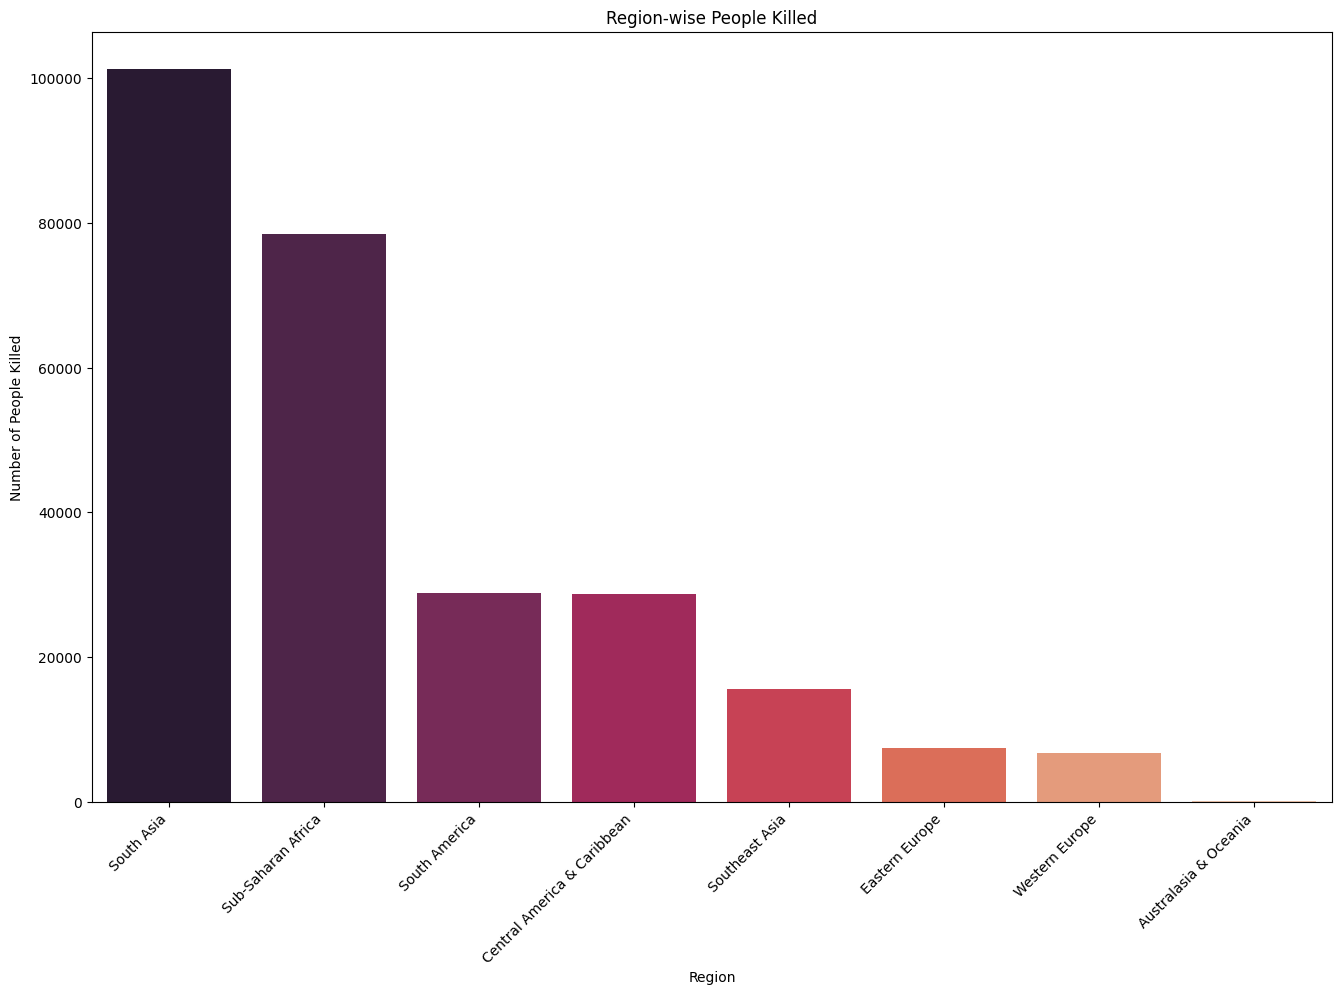

Region-wise People Killed:
Min People Killed: Australasia & Oceania - 150.0 people killed
Max People Killed: South Asia - 101319.0 people killed



In [89]:
# Plotting region-wise people killed
plt.figure(figsize=(16, 10))
sns.barplot(x='Region', y='Killed', data=region_stats.sort_values(by='Killed', ascending=False), palette='rocket')
plt.title('Region-wise People Killed')
plt.xlabel('Region')
plt.ylabel('Number of People Killed')
plt.xticks(rotation=45, ha='right')
plt.show()


# Region-wise People Killed
min_killed_region = region_stats.loc[region_stats['Killed'].idxmin()]
max_killed_region = region_stats.loc[region_stats['Killed'].idxmax()]
print(f"Region-wise People Killed:")
print(f"Min People Killed: {min_killed_region['Region']} - {min_killed_region['Killed']} people killed")
print(f"Max People Killed: {max_killed_region['Region']} - {max_killed_region['Killed']} people killed\n")




#### Region-wise People WOUNDED

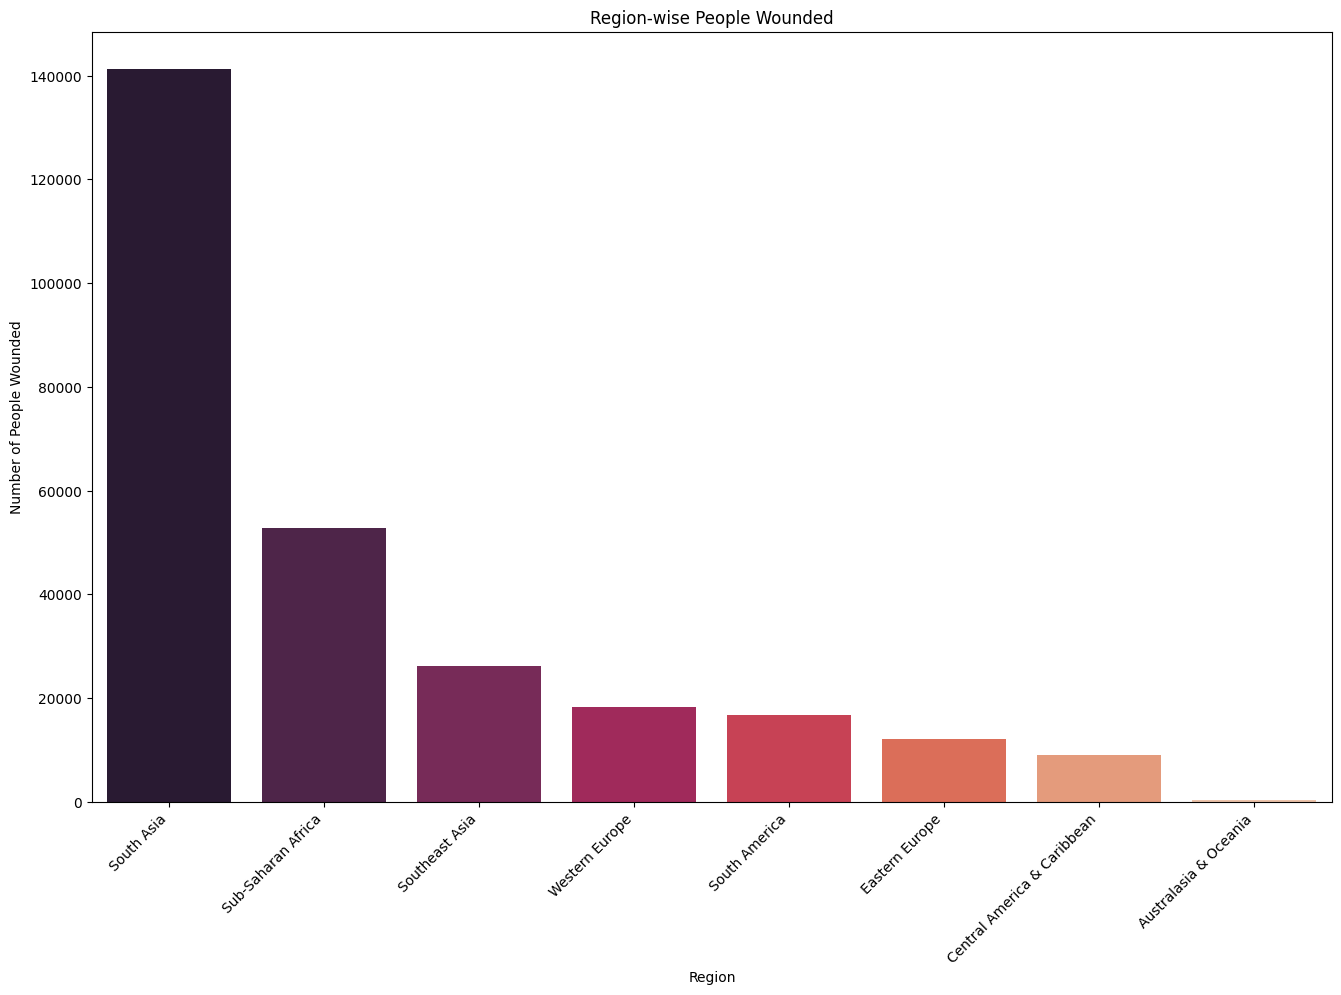

Region-wise People Wounded:
Min People Wounded: Australasia & Oceania - 260.0 people wounded
Max People Wounded: South Asia - 141360.0 people wounded



In [90]:
# Plotting region-wise people wounded
plt.figure(figsize=(16, 10))
sns.barplot(x='Region', y='Wounded', data=region_stats.sort_values(by='Wounded', ascending=False), palette='rocket')
plt.title('Region-wise People Wounded')
plt.xlabel('Region')
plt.ylabel('Number of People Wounded')
plt.xticks(rotation=45, ha='right')
plt.show()


# Region-wise People Wounded
min_wounded_region = region_stats.loc[region_stats['Wounded'].idxmin()]
max_wounded_region = region_stats.loc[region_stats['Wounded'].idxmax()]
print(f"Region-wise People Wounded:")
print(f"Min People Wounded: {min_wounded_region['Region']} - {min_wounded_region['Wounded']} people wounded")
print(f"Max People Wounded: {max_wounded_region['Region']} - {max_wounded_region['Wounded']} people wounded\n")



#### Region-wise CASUALTY

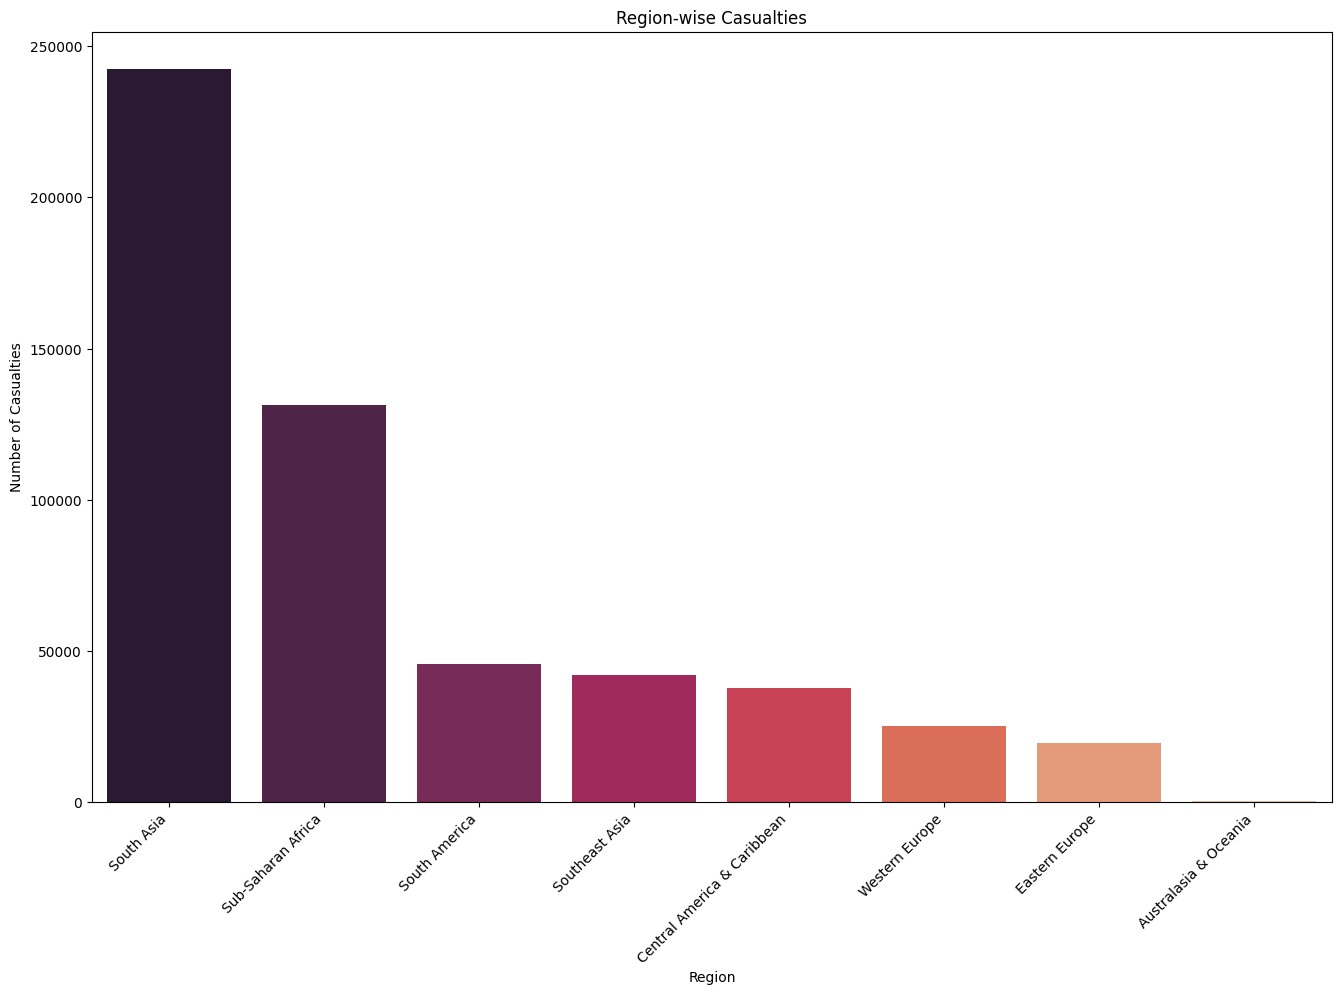

Region-wise Casualties:
Min Casualties: Australasia & Oceania - 410.0 casualties
Max Casualties: South Asia - 242679.0 casualties


In [91]:
# Plotting region-wise casualties
plt.figure(figsize=(16, 10))

plt.title('Region-wise Casualties')
sns.barplot(x='Region', y='Casualty', data=region_stats.sort_values(by='Casualty', ascending=False), palette='rocket')
plt.xlabel('Region')
plt.ylabel('Number of Casualties')
plt.xticks(rotation=45, ha='right')
plt.show()


# Region-wise Casualties
min_casualties_region = region_stats.loc[region_stats['Casualty'].idxmin()]
max_casualties_region = region_stats.loc[region_stats['Casualty'].idxmax()]
print(f"Region-wise Casualties:")
print(f"Min Casualties: {min_casualties_region['Region']} - {min_casualties_region['Casualty']} casualties")
print(f"Max Casualties: {max_casualties_region['Region']} - {max_casualties_region['Casualty']} casualties")

### *3. Country-Wise Analysis*

In [92]:
country_year = pd.crosstab(terror['Year'], terror['Country'])
country_year.head()

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia-Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burundi,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Costa Rica,Croatia,Cuba,Cyprus,Czech Republic,Czechoslovakia,Democratic Republic of the Congo,Denmark,Djibouti,Dominica,Dominican Republic,East Germany (GDR),East Timor,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Ethiopia,Falkland Islands,Fiji,Finland,France,French Guiana,French Polynesia,Gabon,Gambia,Georgia,Germany,Ghana,Greece,Grenada,Guadeloupe,Guatemala,Guinea,Guinea-Bissau,Guyana,Haiti,Honduras,Hong Kong,Hungary,Iceland,India,Indonesia,International,Iran,Iraq,Ireland,Israel,Italy,Ivory Coast,Jamaica,Japan,Jordan,Kazakhstan,Kenya,Kosovo,Kuwait,Kyrgyzstan,Laos,Latvia,Lebanon,Lesotho,Liberia,Libya,Lithuania,Luxembourg,Macau,Macedonia,Madagascar,Malawi,Malaysia,Maldives,Mali,Malta,Martinique,Mauritania,Mauritius,Mexico,Moldova,Montenegro,Morocco,Mozambique,Myanmar,Namibia,Nepal,Netherlands,New Caledonia,New Hebrides,New Zealand,Nicaragua,Niger,Nigeria,North Korea,North Yemen,Norway,Pakistan,Panama,Papua New Guinea,Paraguay,People's Republic of the Congo,Peru,Philippines,Poland,Portugal,Qatar,Republic of the Congo,Rhodesia,Romania,Russia,Rwanda,Saudi Arabia,Senegal,Serbia,Serbia-Montenegro,Seychelles,Sierra Leone,Singapore,Slovak Republic,Slovenia,Solomon Islands,Somalia,South Africa,South Korea,South Sudan,South Vietnam,South Yemen,Soviet Union,Spain,Sri Lanka,St. Kitts and Nevis,St. Lucia,Sudan,Suriname,Swaziland,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Tanzania,Thailand,Togo,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Vatican City,Venezuela,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1970,0,0,0,0,0,0,21,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,6,0,0,0,0,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,12,0,0,1,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,3,0,0,4,0,0,0,0,0,0,0,0,0,0,0,5,0,1,0,3,0,0,2,9,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,3,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,12,0,0,0,0,12,468,33,0,0,0,2,0,0,0,20,0,0,0,0,0,0
1971,0,0,0,0,0,0,7,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,3,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,3,4,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,11,0,1,1,3,0,0,0,5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,22,0,0,0,0,0,0,2,1,0,1,0,0,0,0,0,0,35,0,0,0,0,81,247,8,0,0,0,4,0,0,0,13,0,0,0,0,1,0
1972,0,0,1,0,0,0,20,0,8,7,0,0,0,0,0,0,4,0,0,0,0,0,0,3,5,0,0,0,2,0,4,0,0,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,11,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,15,0,5,15,4,0,0,0,7,0,0,0,1,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,19,0,0,0,0,0,0,3,3,0,0,0,0,1,0,0,0,9,0,0,0,0,292,68,7,0,0,0,1,0,0,1,24,0,0,0,3,0,0
1973,1,0,0,0,0,0,60,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,7,0,6,0,0,0,0,3,0,0,0,0,0,0,3,0,0,1,0,1,0,0,0,1,0,0,0,14,0,0,0,0,0,0,0,11,0,0,0,0,0,0,1,1,0,0,0,0,0,0,4,0,3,1,15,0,0,2,1,0,0,0,0,0,0,0,11,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6,0,0,2,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,189,58,0,0,0,0,4,0,0,0,27,0,0,1,1,1,0
1974,0,0,0,1,0,0,71,0,1,1,0,0,0,0,

In [93]:
# Group by 'Country' and count the number of attacks, people killed, people wounded, and casualties
country_stats = terror.groupby('Country').agg({
    'Year': 'count',
    'Killed': 'sum',
    'Wounded': 'sum',
    'Casualty': 'sum'
}).reset_index()

# Print the top 15 countries by the number of attacks
top_countries_attacks = country_stats.sort_values(by='Year', ascending=False).head(15)
print("Top 15 countries by the number of attacks:")
print(top_countries_attacks[['Country', 'Year']])

# Print only the top 15 country names by the number of attacks
top_countries_attacks = country_stats.sort_values(by='Year', ascending=False).head(15)
print("Top 15 countries by the number of attacks:")
print(top_countries_attacks['Country'].tolist())

Top 15 countries by the number of attacks:
            Country   Year
84             Iraq  24636
134        Pakistan  14368
0       Afghanistan  12731
80            India  11960
35         Colombia   8306
140     Philippines   6908
139            Peru   6096
52      El Salvador   5320
188  United Kingdom   5235
183          Turkey   4292
159         Somalia   4142
130         Nigeria   3907
179        Thailand   3849
200           Yemen   3347
166           Spain   3249
Top 15 countries by the number of attacks:
['Iraq', 'Pakistan', 'Afghanistan', 'India', 'Colombia', 'Philippines', 'Peru', 'El Salvador', 'United Kingdom', 'Turkey', 'Somalia', 'Nigeria', 'Thailand', 'Yemen', 'Spain']


In [94]:
# Country-wise analysis
country_stats = terror.groupby('Country').agg({
    'eventid': 'count',
    'Killed': 'sum',
    'Wounded': 'sum',
    'Casualty': 'sum'
}).reset_index()

In [95]:
# Selected countries
selected_countries = ['Iraq', 'Pakistan', 'Afghanistan', 'India', 'Colombia', 'Philippines', 'Peru', 'El Salvador', 'United Kingdom', 'Turkey', 'Somalia', 'Nigeria', 'Thailand', 'Yemen', 'Spain']

# Filter data for the selected countries
terror_selected_countries = terror[terror['Country'].isin(selected_countries)]

# Country-wise analysis for selected countries
country_stats_selected = terror_selected_countries.groupby('Country').agg({
    'Year': 'count',
    'Killed': 'sum',
    'Wounded': 'sum',
    'Casualty': 'sum'
}).reset_index()

#### Country-wise Yearly ATTACKS

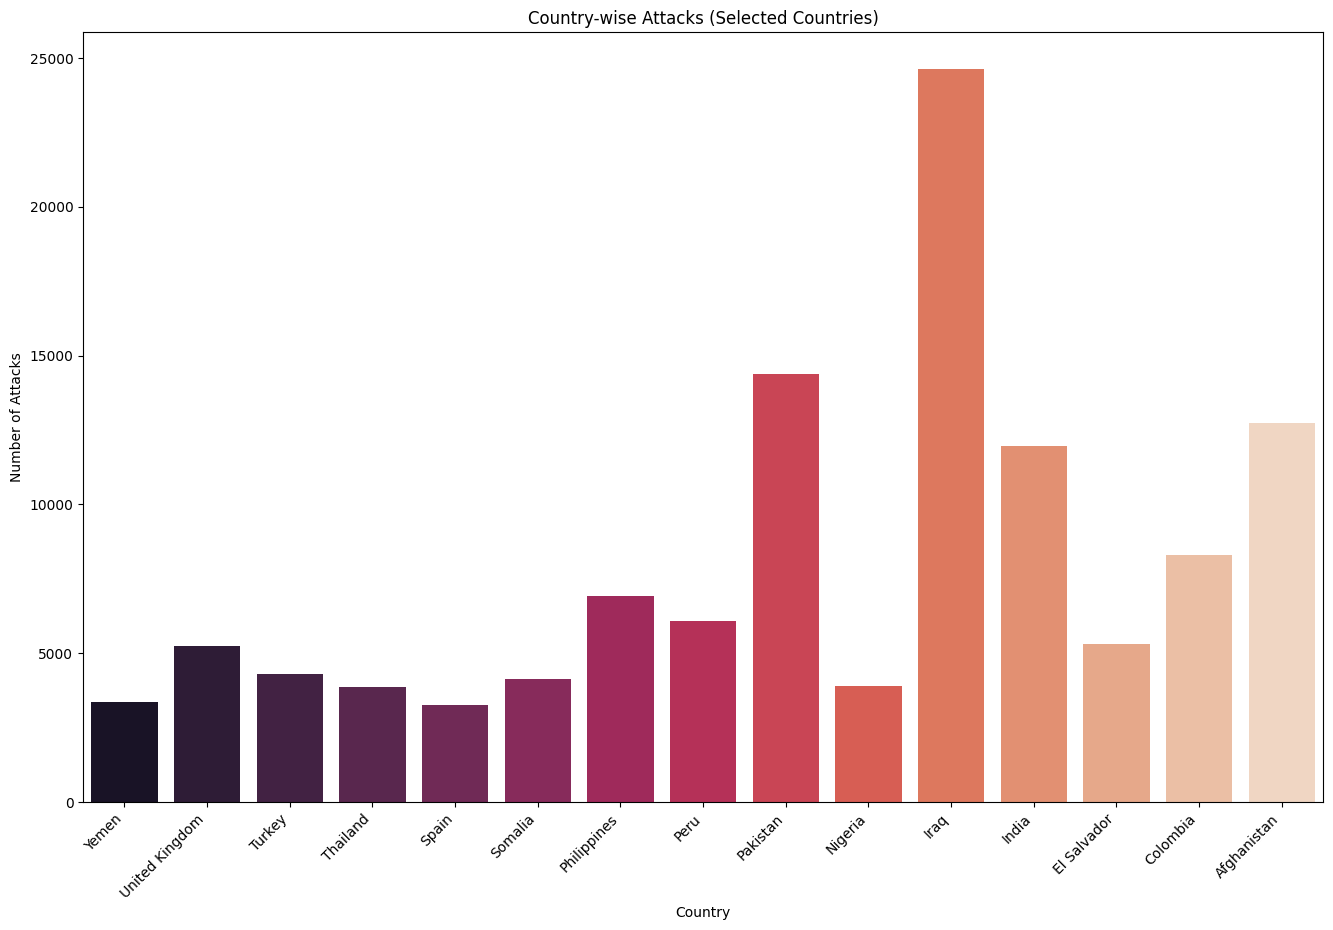

Country-wise Attacks (Selected Countries):
Min Attacks: Spain - 3249 attacks
Max Attacks: Iraq - 24636 attacks



In [96]:
# Plotting country-wise attacks for selected countries
plt.figure(figsize=(16, 10))
sns.barplot(x='Country', y='Year', data=country_stats_selected.sort_values(by='Country', ascending=False), palette='rocket')
plt.title('Country-wise Attacks (Selected Countries)')
plt.xlabel('Country')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45, ha='right')
plt.show()

# Print min and max values for each metric
min_attacks_country_selected = country_stats_selected.loc[country_stats_selected['Year'].idxmin()]
max_attacks_country_selected = country_stats_selected.loc[country_stats_selected['Year'].idxmax()]
print(f"Country-wise Attacks (Selected Countries):")
print(f"Min Attacks: {min_attacks_country_selected['Country']} - {min_attacks_country_selected['Year']} attacks")
print(f"Max Attacks: {max_attacks_country_selected['Country']} - {max_attacks_country_selected['Year']} attacks\n")


#### Country-wise people Killed

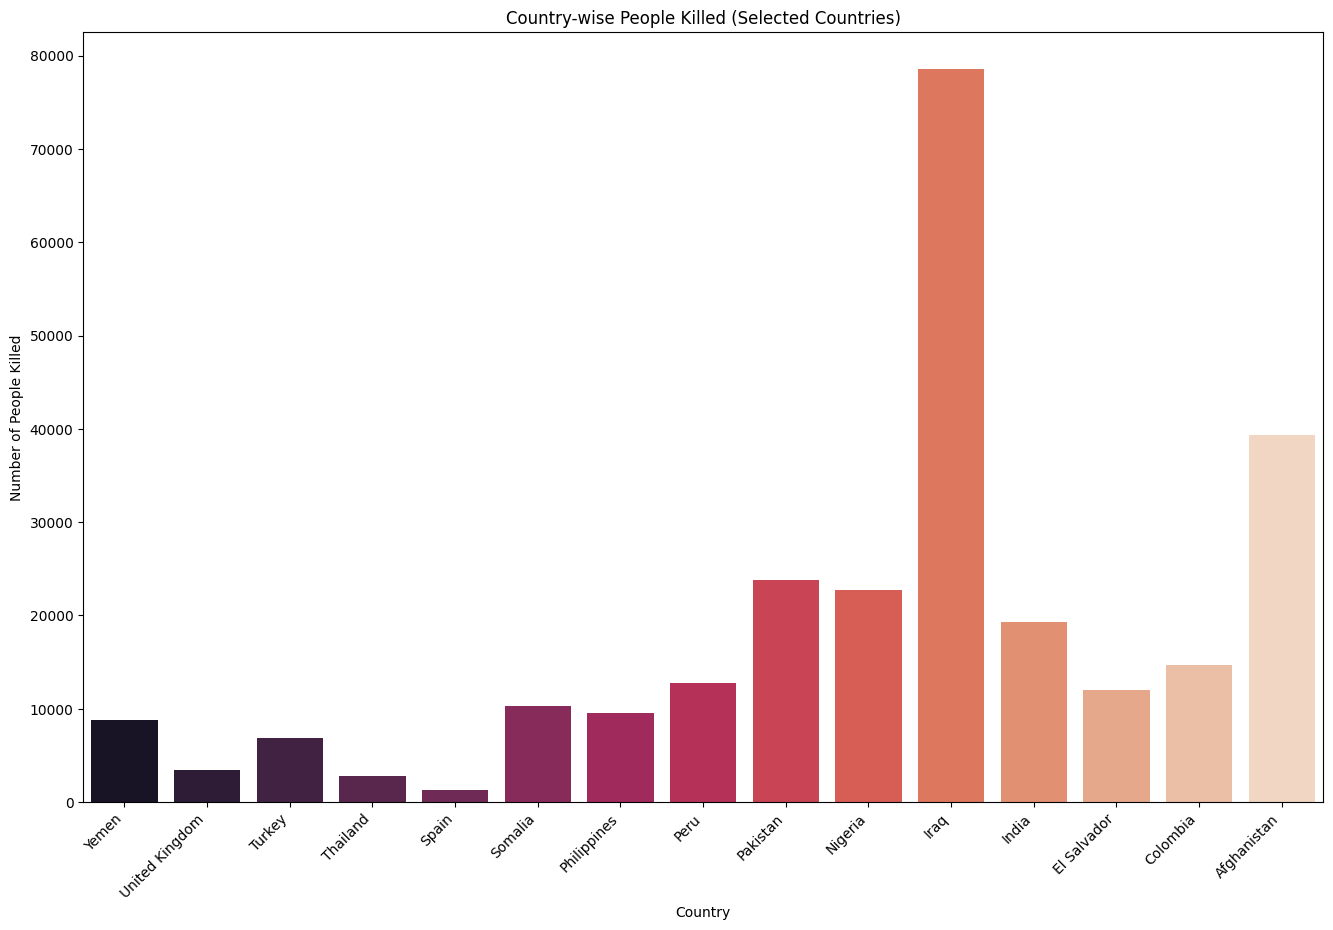

Country-wise People Killed (Selected Countries):
Min People Killed: Spain - 1288.0 people killed
Max People Killed: Iraq - 78589.0 people killed



In [97]:
# Plotting country-wise people killed for selected countries
plt.figure(figsize=(16, 10))
sns.barplot(x='Country', y='Killed', data=country_stats_selected.sort_values(by='Country', ascending=False), palette='rocket')
plt.title('Country-wise People Killed (Selected Countries)')
plt.xlabel('Country')
plt.ylabel('Number of People Killed')
plt.xticks(rotation=45, ha='right')
plt.show()

# Print min and max values for country-wise people killed
min_killed_country_selected = country_stats_selected.loc[country_stats_selected['Killed'].idxmin()]
max_killed_country_selected = country_stats_selected.loc[country_stats_selected['Killed'].idxmax()]
print(f"Country-wise People Killed (Selected Countries):")
print(f"Min People Killed: {min_killed_country_selected['Country']} - {min_killed_country_selected['Killed']} people killed")
print(f"Max People Killed: {max_killed_country_selected['Country']} - {max_killed_country_selected['Killed']} people killed\n")

#### Country-wise people Wounded

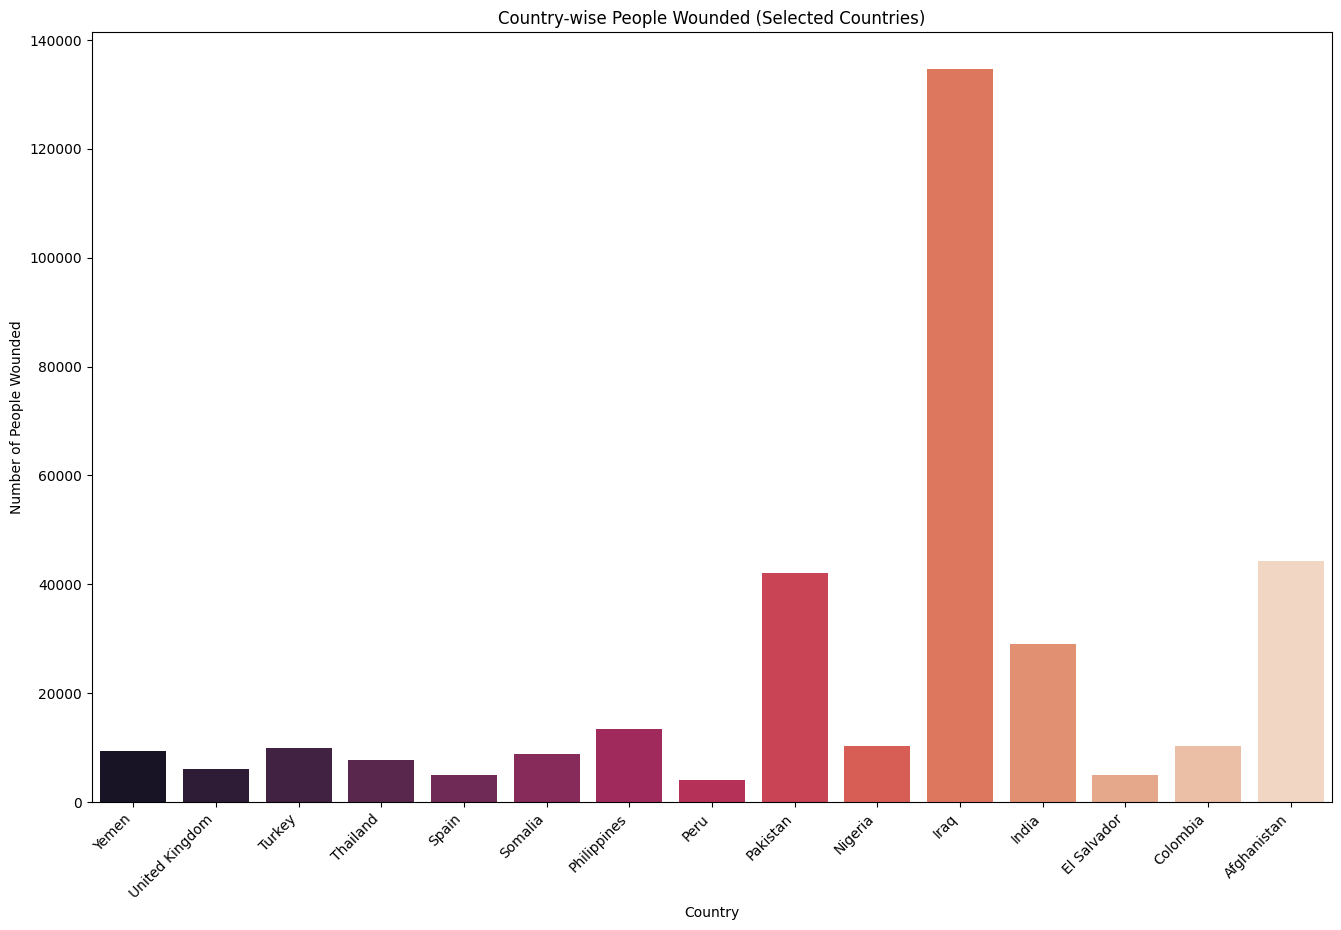

Country-wise People Wounded (Selected Countries):
Min People Wounded: Peru - 4078.0 people wounded
Max People Wounded: Iraq - 134690.0 people wounded



In [98]:
# Plotting country-wise people wounded for selected countries
plt.figure(figsize=(16, 10))
sns.barplot(x='Country', y='Wounded', data=country_stats_selected.sort_values(by='Country', ascending=False), palette='rocket')
plt.title('Country-wise People Wounded (Selected Countries)')
plt.xlabel('Country')
plt.ylabel('Number of People Wounded')
plt.xticks(rotation=45, ha='right')
plt.show()

# Print min and max values for country-wise people wounded
min_wounded_country_selected = country_stats_selected.loc[country_stats_selected['Wounded'].idxmin()]
max_wounded_country_selected = country_stats_selected.loc[country_stats_selected['Wounded'].idxmax()]
print(f"Country-wise People Wounded (Selected Countries):")
print(f"Min People Wounded: {min_wounded_country_selected['Country']} - {min_wounded_country_selected['Wounded']} people wounded")
print(f"Max People Wounded: {max_wounded_country_selected['Country']} - {max_wounded_country_selected['Wounded']} people wounded\n")


#### Country-wise Casualty

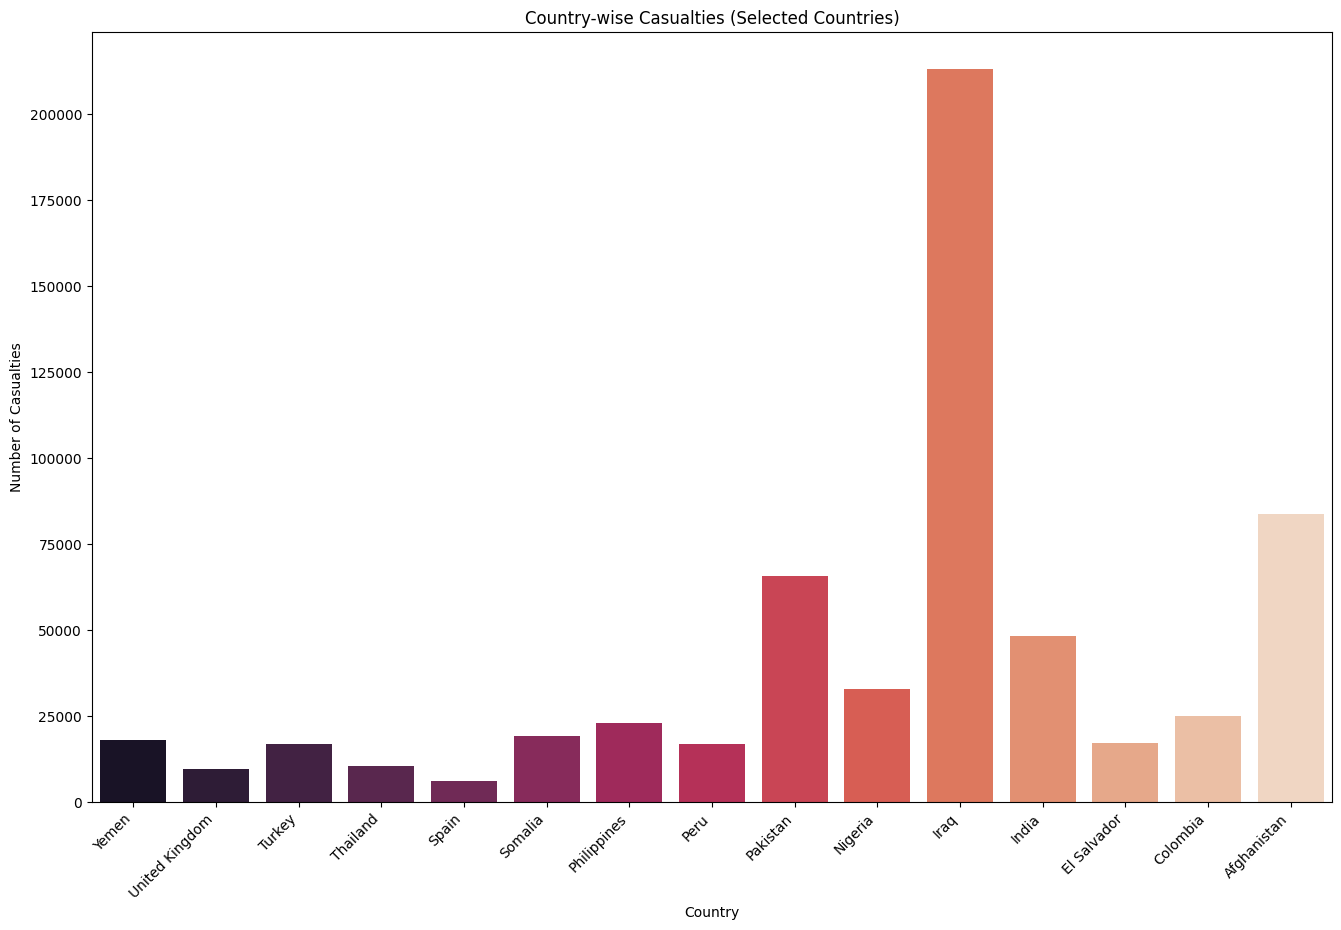

Country-wise Casualties (Selected Countries):
Min Casualties: Spain - 6223.0 casualties
Max Casualties: Iraq - 213279.0 casualties


In [99]:
# Plotting country-wise casualties for selected countries
plt.figure(figsize=(16, 10))
sns.barplot(x='Country', y='Casualty', data=country_stats_selected.sort_values(by='Country', ascending=False), palette='rocket')
plt.title('Country-wise Casualties (Selected Countries)')
plt.xlabel('Country')
plt.ylabel('Number of Casualties')
plt.xticks(rotation=45, ha='right')
plt.show()

# Print min and max values for country-wise casualties
min_casualty_country_selected = country_stats_selected.loc[country_stats_selected['Casualty'].idxmin()]
max_casualty_country_selected = country_stats_selected.loc[country_stats_selected['Casualty'].idxmax()]
print(f"Country-wise Casualties (Selected Countries):")
print(f"Min Casualties: {min_casualty_country_selected['Country']} - {min_casualty_country_selected['Casualty']} casualties")
print(f"Max Casualties: {max_casualty_country_selected['Country']} - {max_casualty_country_selected['Casualty']} casualties")

### *4. City-Wise Analysis*

In [100]:
# City-wise analysis
city_stats = terror.groupby('City').agg({
    'Year': 'count',
    'Killed': 'sum',
    'Wounded': 'sum',
    'Casualty': 'sum'
}).reset_index()

# Print the top 50 cities by the number of attacks
top_cities_attacks = city_stats.sort_values(by='Year', ascending=False).head(50)
print("Top 50 cities by the number of attacks:")
print(top_cities_attacks[['City', 'Year']])

# Print only the top 50 city names by the number of attacks
top_cities_attacks = city_stats.sort_values(by='Year', ascending=False).head(50)
print("Top 50 cities by the number of attacks:")
print(top_cities_attacks['City'].tolist())



Top 50 cities by the number of attacks:
                 City  Year
34517         Unknown  9775
3042          Baghdad  7589
16058         Karachi  2652
19571            Lima  2359
22828           Mosul  2265
4503          Belfast  2171
29788        Santiago  1621
22519       Mogadishu  1581
29535    San Salvador  1558
14438        Istanbul  1048
2513           Athens  1019
5343           Bogota   984
17457          Kirkuk   925
4417           Beirut   918
21946        Medellin   848
4600         Benghazi   840
26275        Peshawar   819
27530          Quetta   803
12577  Guatemala City   755
3866          Baqubah   745
15377           Kabul   738
31805        Srinagar   658
15026       Jerusalem   636
25898           Paris   612
10930        Fallujah   582
33973         Tripoli   565
9175            Dhaka   557
28384            Rome   551
2198            Arish   521
27789          Ramadi   509
21086          Manila   488
1374           Aleppo   486
29560           Sanaa   472
5832    

#### City-wise Yearly ATTACKS

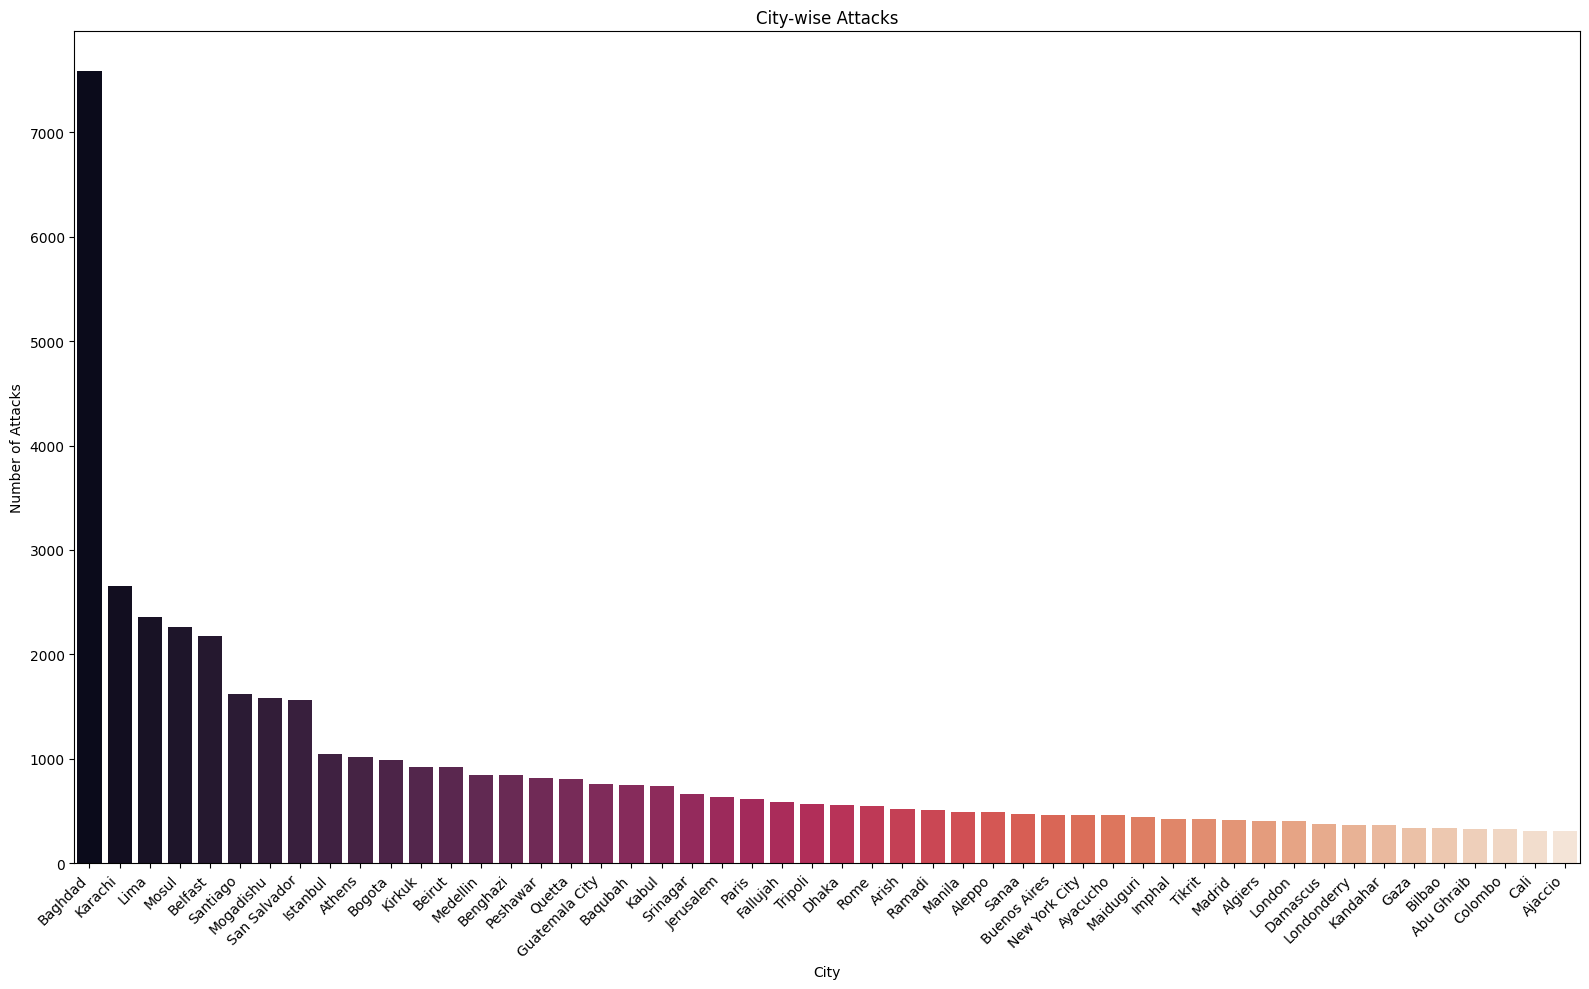

City-wise Attacks (without 'Unknown'):
Min Attacks: 62 miles South of Dushanbe - 1 attacks
Max Attacks: Baghdad - 7589 attacks



In [101]:
# Filter out rows where the 'City' is 'Unknown'
terror_filtered_cities = terror[terror['City'] != 'Unknown']

# City-wise analysis without 'Unknown' cities
city_stats_filtered = terror_filtered_cities.groupby('City').agg({
    'Year': 'count',
    'Killed': 'sum',
    'Wounded': 'sum',
    'Casualty': 'sum'
}).reset_index()

# Plotting city-wise attacks using 'Year'
plt.figure(figsize=(16, 10))
sns.barplot(x='City', y='Year', data=city_stats_filtered.sort_values(by='Year', ascending=False).head(50), palette='rocket')
plt.title('City-wise Attacks')
plt.xlabel('City')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to prevent x-axis label overlap
plt.show()

# Print min and max values for city-wise attacks without 'Unknown'
min_attacks_city_filtered = city_stats_filtered.loc[city_stats_filtered['Year'].idxmin()]
max_attacks_city_filtered = city_stats_filtered.loc[city_stats_filtered['Year'].idxmax()]
print(f"City-wise Attacks (without 'Unknown'):")
print(f"Min Attacks: {min_attacks_city_filtered['City']} - {min_attacks_city_filtered['Year']} attacks")
print(f"Max Attacks: {max_attacks_city_filtered['City']} - {max_attacks_city_filtered['Year']} attacks\n")


#### City-wise People KILLED

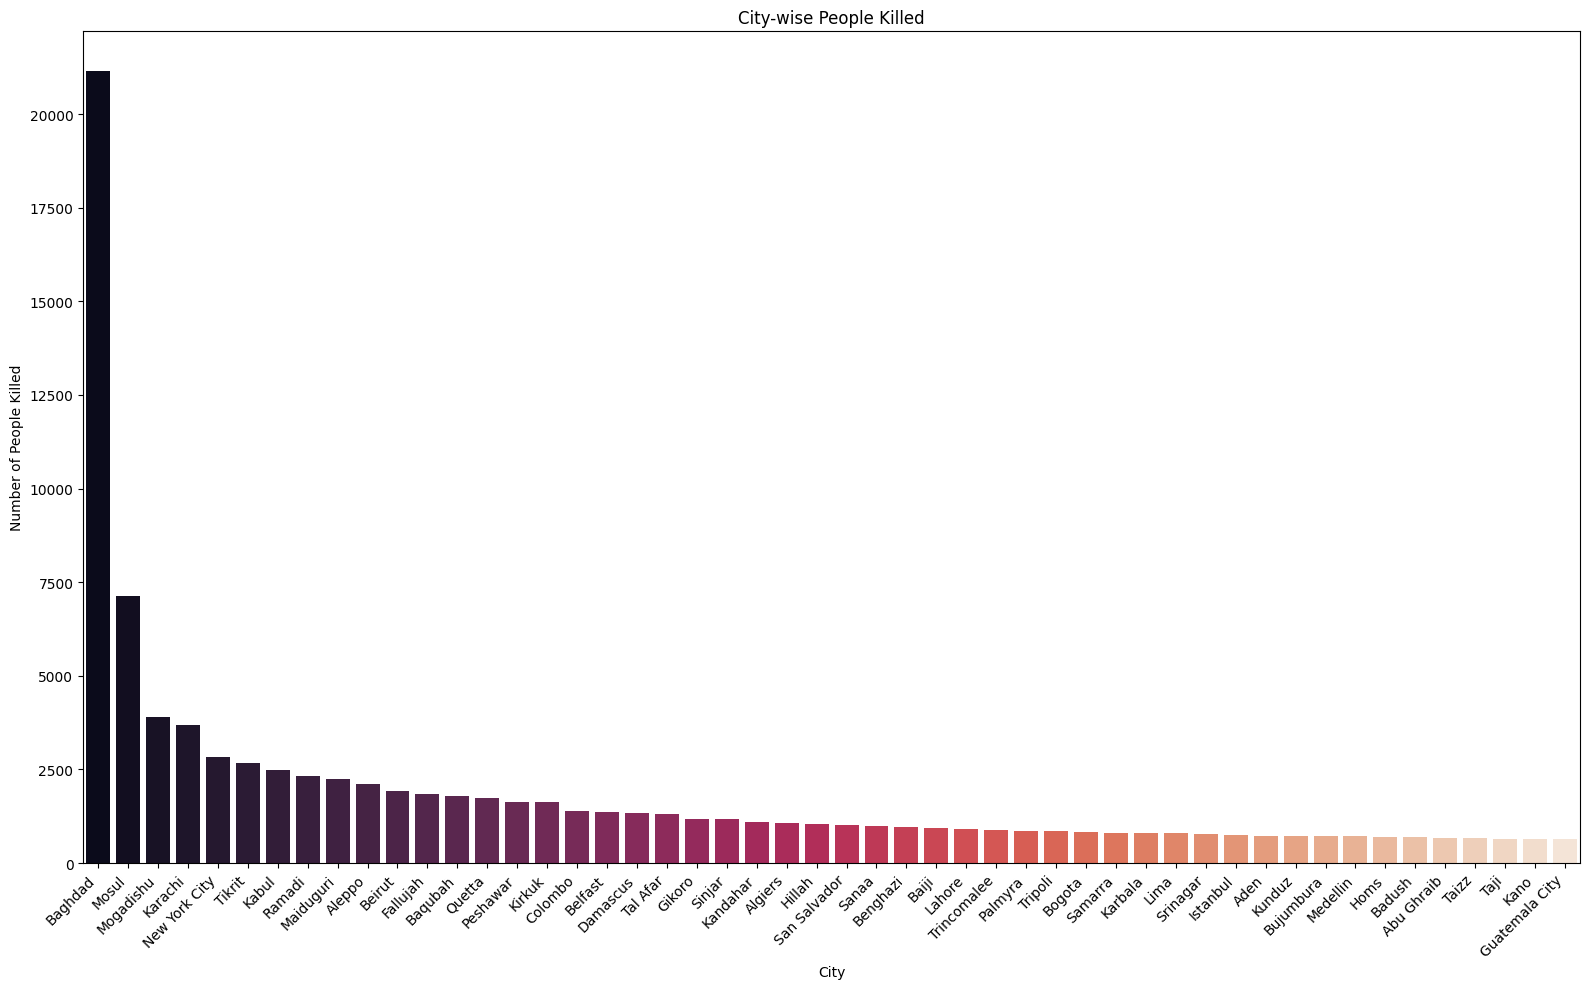

City-wise People Killed (without 'Unknown'):
Min People Killed: ANkara - 0.0 people killed
Max People Killed: Baghdad - 21151.0 people killed



In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out rows where the 'City' is 'Unknown'
terror_filtered_cities = terror[terror['City'] != 'Unknown']

# City-wise analysis of people killed without 'Unknown' cities
city_stats_filtered = terror_filtered_cities.groupby('City').agg({
    'Killed': 'sum'
}).reset_index()

# Plotting city-wise people killed
plt.figure(figsize=(16, 10))
sns.barplot(x='City', y='Killed', data=city_stats_filtered.sort_values(by='Killed', ascending=False).head(50), palette='rocket')
plt.title('City-wise People Killed')
plt.xlabel('City')
plt.ylabel('Number of People Killed')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Print min and max values for city-wise people killed without 'Unknown'
min_killed_city_filtered = city_stats_filtered.loc[city_stats_filtered['Killed'].idxmin()]
max_killed_city_filtered = city_stats_filtered.loc[city_stats_filtered['Killed'].idxmax()]
print(f"City-wise People Killed (without 'Unknown'):")
print(f"Min People Killed: {min_killed_city_filtered['City']} - {min_killed_city_filtered['Killed']} people killed")
print(f"Max People Killed: {max_killed_city_filtered['City']} - {max_killed_city_filtered['Killed']} people killed\n")


#### City-wise People WOUNDED

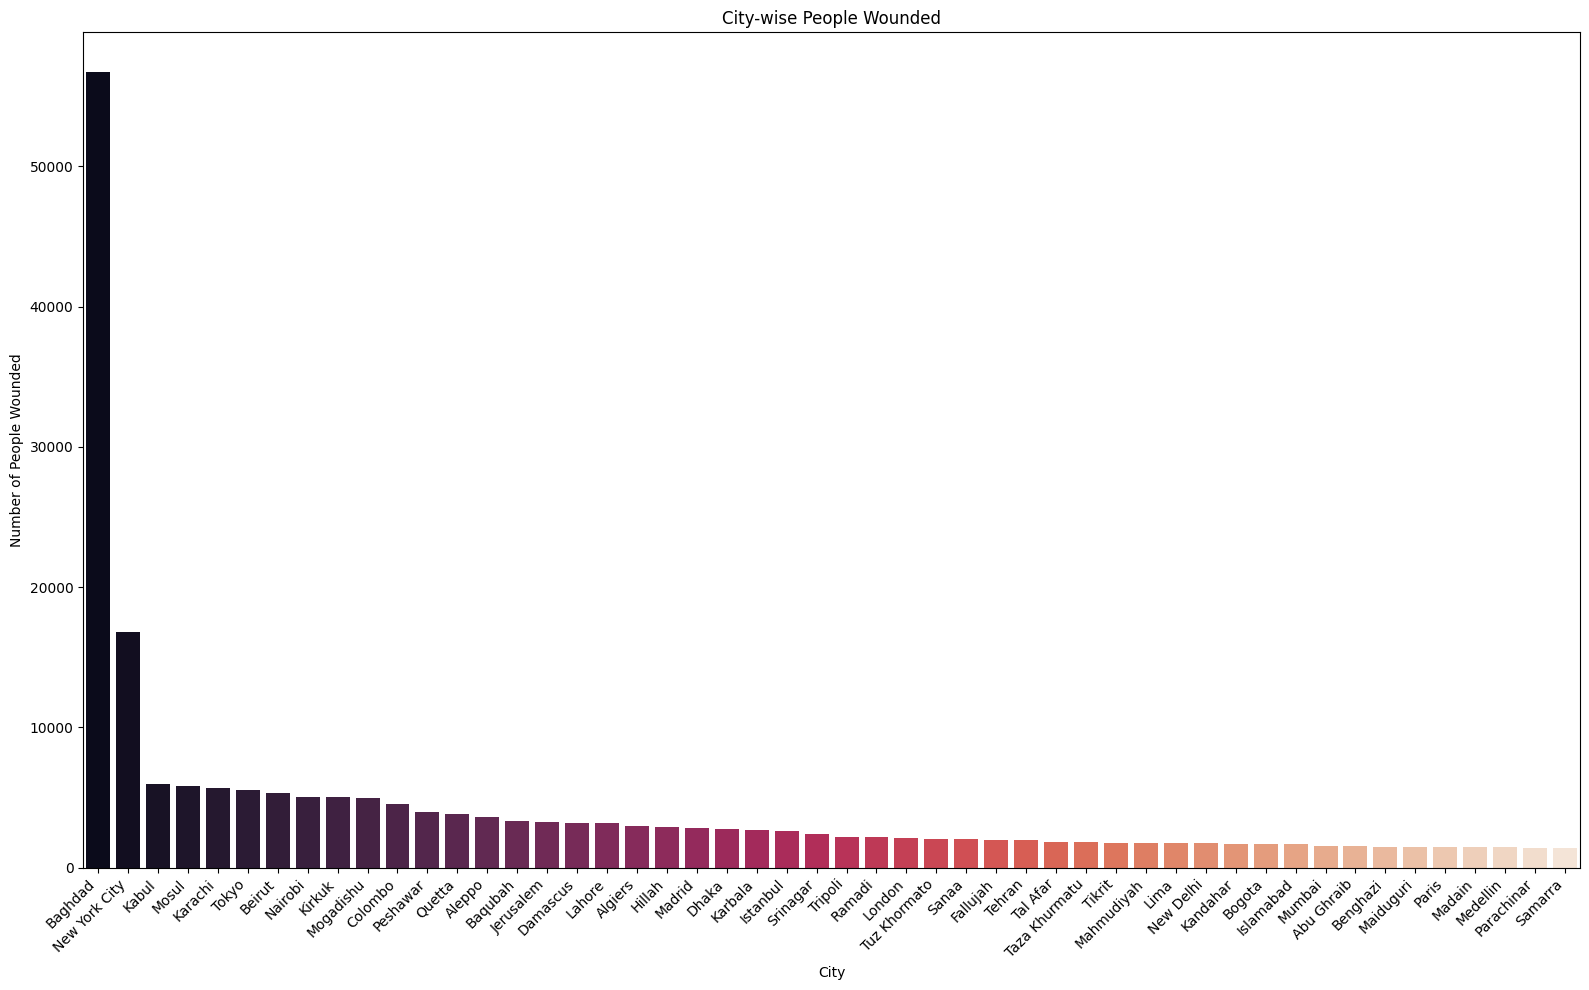

City-wise People Wounded (without 'Unknown'):
Min People Wounded: 62 miles South of Dushanbe - 0.0 people wounded
Max People Wounded: Baghdad - 56725.0 people wounded



In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out rows where the 'City' is 'Unknown'
terror_filtered_cities = terror[terror['City'] != 'Unknown']

# City-wise analysis of people wounded without 'Unknown' cities
city_stats_filtered = terror_filtered_cities.groupby('City').agg({
    'Wounded': 'sum'
}).reset_index()

# Plotting city-wise people wounded
plt.figure(figsize=(16, 10))
sns.barplot(x='City', y='Wounded', data=city_stats_filtered.sort_values(by='Wounded', ascending=False).head(50), palette='rocket')
plt.title('City-wise People Wounded')
plt.xlabel('City')
plt.ylabel('Number of People Wounded')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Print min and max values for city-wise people wounded without 'Unknown'
min_wounded_city_filtered = city_stats_filtered.loc[city_stats_filtered['Wounded'].idxmin()]
max_wounded_city_filtered = city_stats_filtered.loc[city_stats_filtered['Wounded'].idxmax()]
print(f"City-wise People Wounded (without 'Unknown'):")
print(f"Min People Wounded: {min_wounded_city_filtered['City']} - {min_wounded_city_filtered['Wounded']} people wounded")
print(f"Max People Wounded: {max_wounded_city_filtered['City']} - {max_wounded_city_filtered['Wounded']} people wounded\n")


#### City-wise CASUALTY

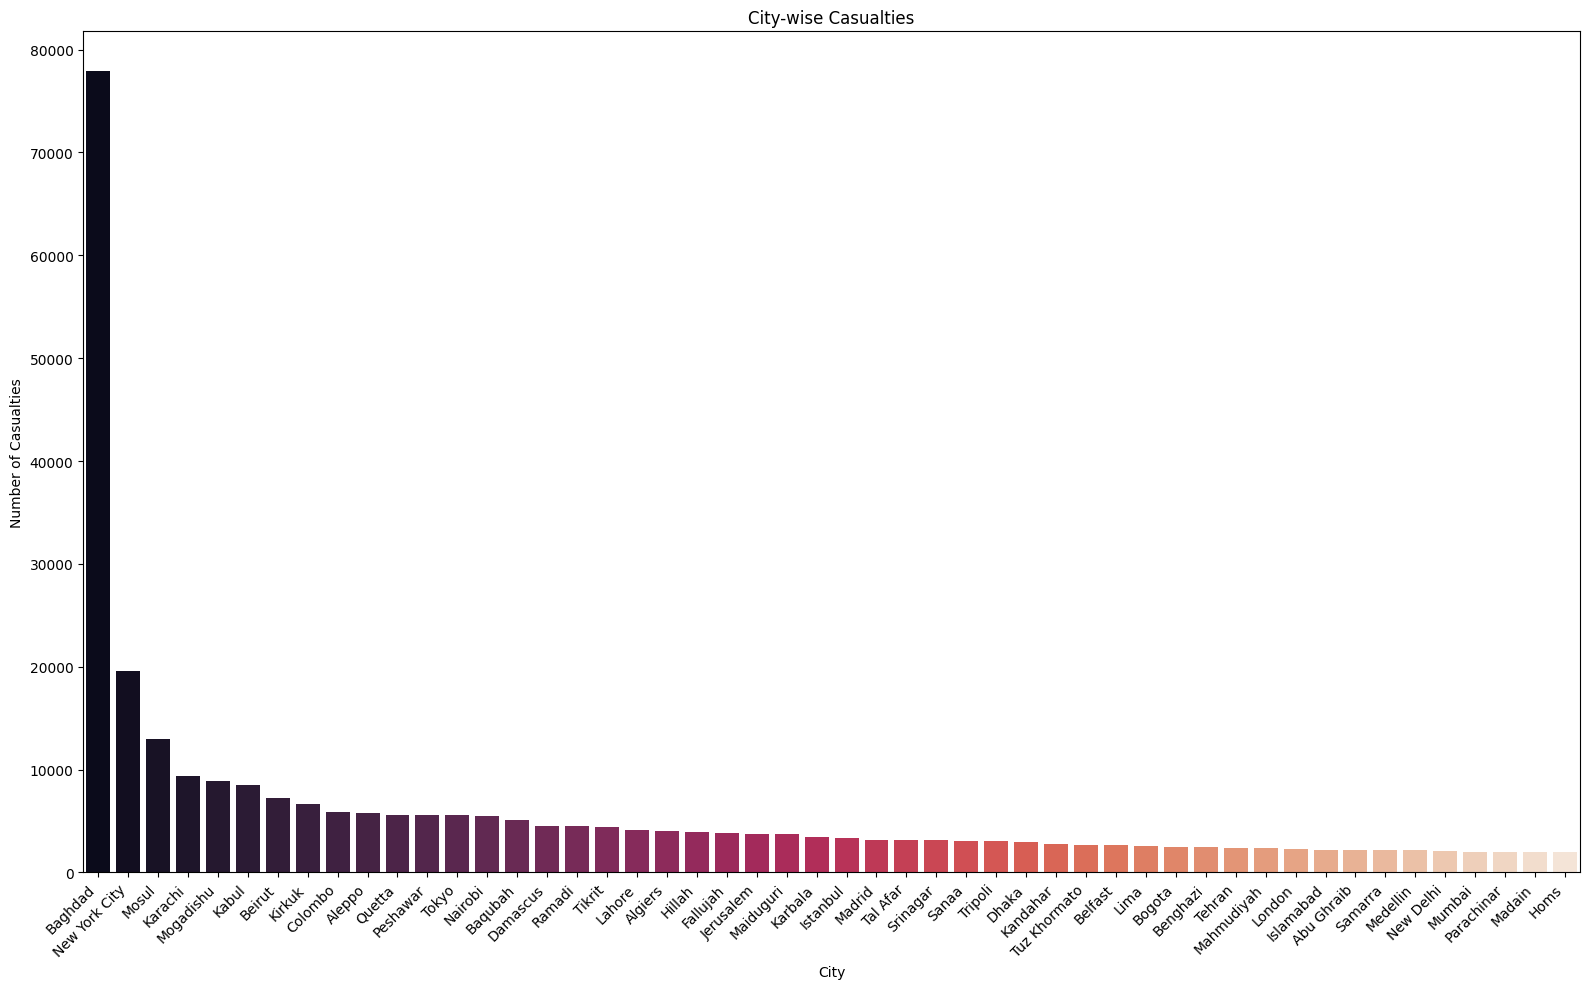

City-wise Casualties (without 'Unknown'):
Min Casualties: ANkara - 0.0 casualties
Max Casualties: Baghdad - 77876.0 casualties


In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out rows where the 'City' is 'Unknown'
terror_filtered_cities = terror[terror['City'] != 'Unknown']

# City-wise analysis of casualties without 'Unknown' cities
city_stats_filtered = terror_filtered_cities.groupby('City').agg({
    'Casualty': 'sum'
}).reset_index()

# Plotting city-wise casualties
plt.figure(figsize=(16, 10))
sns.barplot(x='City', y='Casualty', data=city_stats_filtered.sort_values(by='Casualty', ascending=False).head(50), palette='rocket')
plt.title('City-wise Casualties')
plt.xlabel('City')
plt.ylabel('Number of Casualties')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Print min and max values for city-wise casualties without 'Unknown'
min_casualty_city_filtered = city_stats_filtered.loc[city_stats_filtered['Casualty'].idxmin()]
max_casualty_city_filtered = city_stats_filtered.loc[city_stats_filtered['Casualty'].idxmax()]
print(f"City-wise Casualties (without 'Unknown'):")
print(f"Min Casualties: {min_casualty_city_filtered['City']} - {min_casualty_city_filtered['Casualty']} casualties")
print(f"Max Casualties: {max_casualty_city_filtered['City']} - {max_casualty_city_filtered['Casualty']} casualties")


### *5. Group-Wise Analysis*

In [105]:
# Perpetrator group-wise analysis
group_stats = terror.groupby('Group').agg({
    'Year': 'count',
    'Killed': 'sum',
    'Wounded': 'sum',
    'Casualty': 'sum'
}).reset_index()

# Print the top 25 terrorist groups by the number of attacks
top_groups_attacks = group_stats.sort_values(by='Year', ascending=False).head(25)
print("Top 25 terrorist groups by the number of attacks:")
print(top_groups_attacks[['Group', 'Year']])

# Print only the top 25 terrorist group names by the number of attacks
top_groups_attacks = group_stats.sort_values(by='Year', ascending=False).head(25)
print("Top 25 terrorist groups by the number of attacks:")
print(top_groups_attacks['Group'].tolist())

Top 25 terrorist groups by the number of attacks:
                                                 Group   Year
3408                                           Unknown  82782
3138                                           Taliban   7478
1535       Islamic State of Iraq and the Levant (ISIL)   5613
2948                                 Shining Path (SL)   4555
1120  Farabundo Marti National Liberation Front (FMLN)   3351
177                                         Al-Shabaab   3288
2266                           New People's Army (NPA)   2772
1484                       Irish Republican Army (IRA)   2671
2717     Revolutionary Armed Forces of Colombia (FARC)   2487
704                                         Boko Haram   2418
1800                    Kurdistan Workers' Party (PKK)   2310
617                Basque Fatherland and Freedom (ETA)   2024
888     Communist Party of India - Maoist (CPI-Maoist)   1878
1963                                           Maoists   1630
1864           Liber

#### Group-Wise Yearly ATTACKS

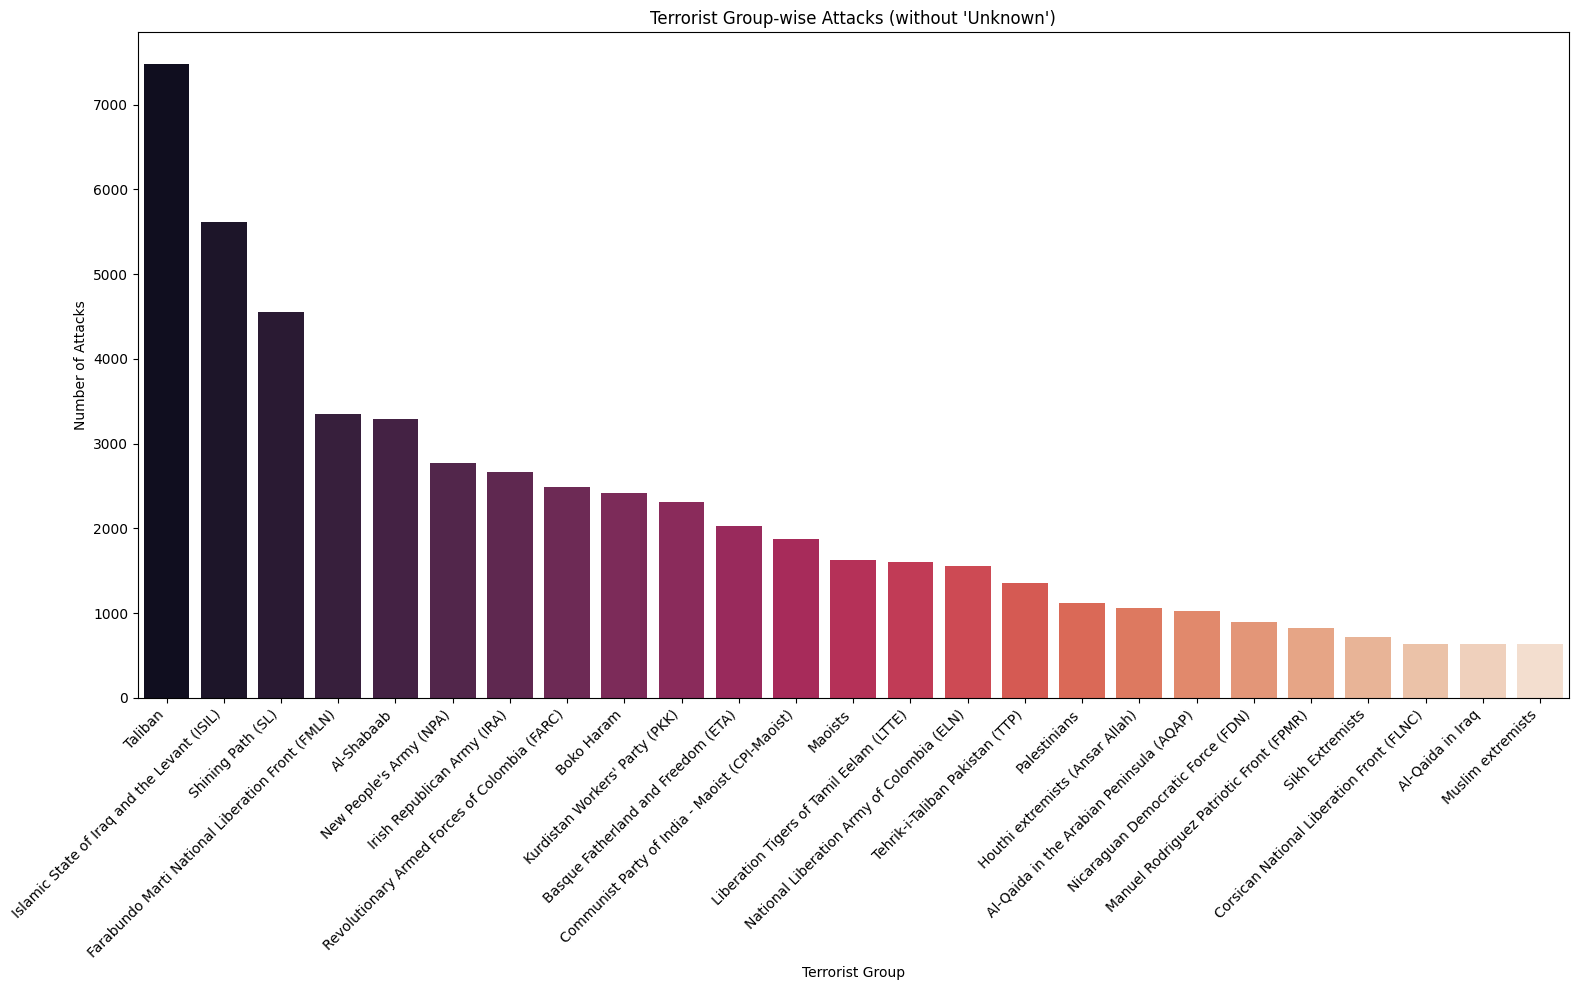

Terrorist Group-wise Attacks (without 'Unknown'):
Min Attacks: 14 March Coalition - 1 attacks
Max Attacks: Taliban - 7478 attacks



In [106]:
# Filter out rows where the 'Group' is 'Unknown'
terror_filtered_groups = terror[terror['Group'] != 'Unknown']

# Group-wise analysis of attacks without 'Unknown' groups
group_stats_filtered = terror_filtered_groups.groupby('Group').agg({
    'Year': 'count'
}).reset_index()

# Plotting terrorist group-wise attacks without 'Unknown'
plt.figure(figsize=(16, 10))
sns.barplot(x='Group', y='Year', data=group_stats_filtered.sort_values(by='Year', ascending=False).head(25), palette='rocket')
plt.title('Terrorist Group-wise Attacks (without \'Unknown\')')
plt.xlabel('Terrorist Group')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to prevent x-axis label overlap
plt.show()

# Print min and max values for terrorist group-wise attacks without 'Unknown'
min_attacks_group_filtered = group_stats_filtered.loc[group_stats_filtered['Year'].idxmin()]
max_attacks_group_filtered = group_stats_filtered.loc[group_stats_filtered['Year'].idxmax()]
print(f"Terrorist Group-wise Attacks (without 'Unknown'):")
print(f"Min Attacks: {min_attacks_group_filtered['Group']} - {min_attacks_group_filtered['Year']} attacks")
print(f"Max Attacks: {max_attacks_group_filtered['Group']} - {max_attacks_group_filtered['Year']} attacks\n")

#### Group-Wise People KILLED

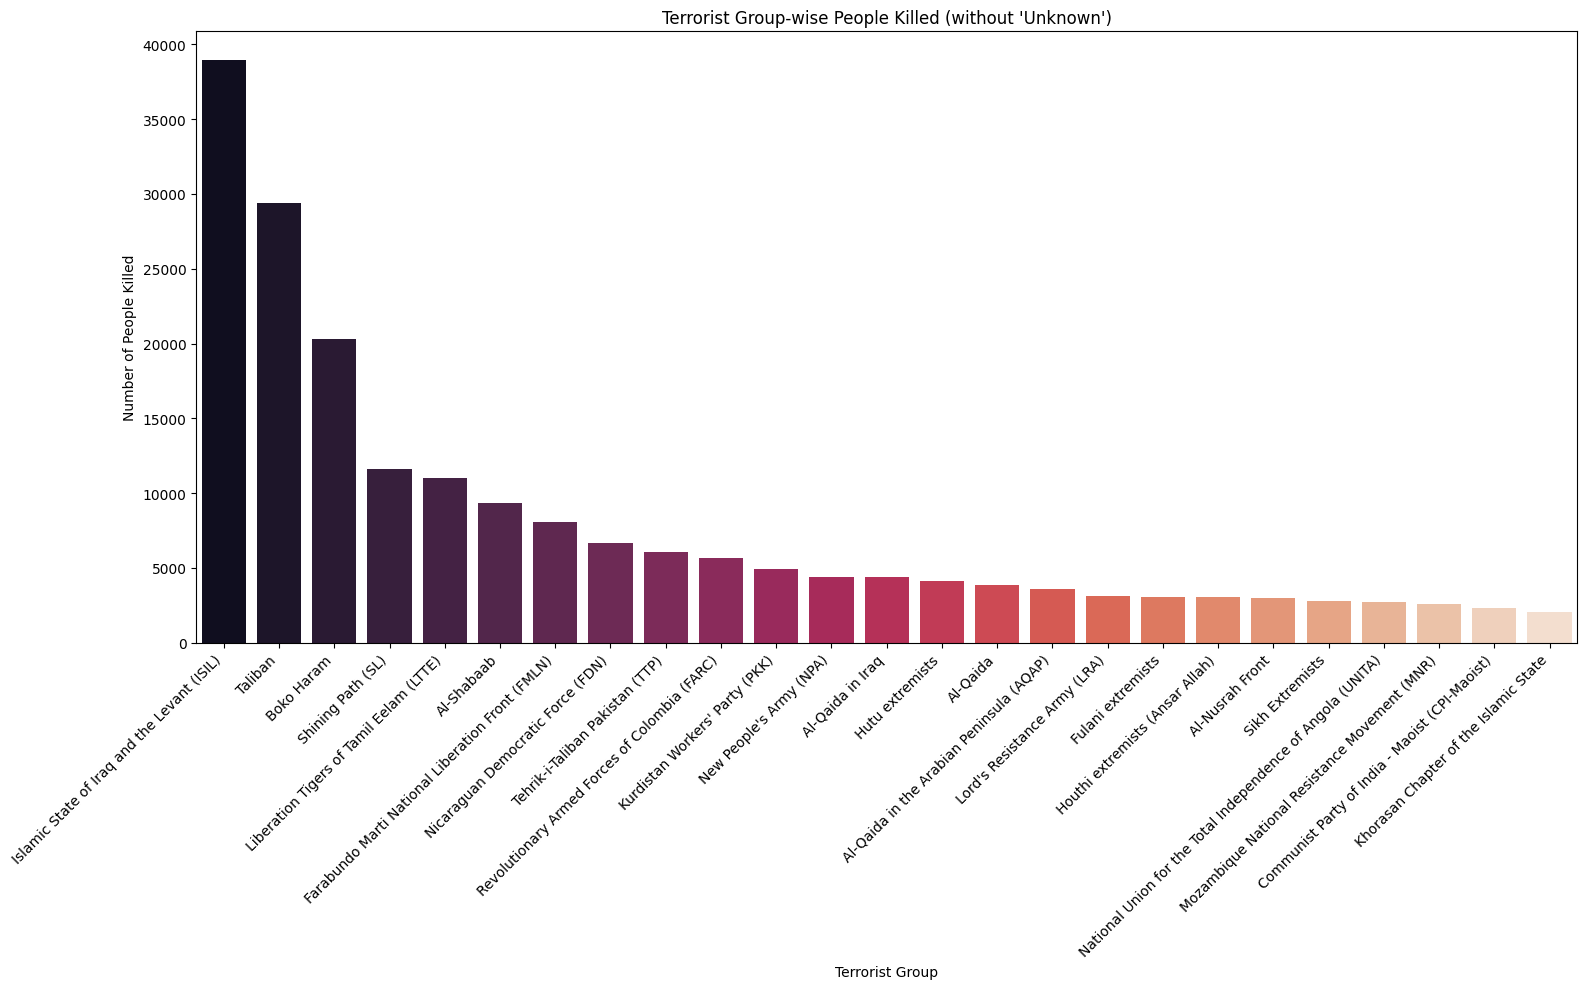

Terrorist Group-wise People Killed (without 'Unknown'):
Min People Killed: 14 K Triad - 0.0 people killed
Max People Killed: Islamic State of Iraq and the Levant (ISIL) - 38923.0 people killed



In [107]:
# Filter out rows where the 'Group' is 'Unknown'
terror_filtered_groups = terror[terror['Group'] != 'Unknown']

# Group-wise analysis of people killed without 'Unknown' groups
group_stats_filtered_killed = terror_filtered_groups.groupby('Group')['Killed'].sum().reset_index()

# Plotting terrorist group-wise people killed without 'Unknown'
plt.figure(figsize=(16, 10))
sns.barplot(x='Group', y='Killed', data=group_stats_filtered_killed.sort_values(by='Killed', ascending=False).head(25), palette='rocket')
plt.title('Terrorist Group-wise People Killed (without \'Unknown\')')
plt.xlabel('Terrorist Group')
plt.ylabel('Number of People Killed')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Print min and max values for terrorist group-wise people killed without 'Unknown'
min_killed_group_filtered = group_stats_filtered_killed.loc[group_stats_filtered_killed['Killed'].idxmin()]
max_killed_group_filtered = group_stats_filtered_killed.loc[group_stats_filtered_killed['Killed'].idxmax()]
print(f"Terrorist Group-wise People Killed (without 'Unknown'):")
print(f"Min People Killed: {min_killed_group_filtered['Group']} - {min_killed_group_filtered['Killed']} people killed")
print(f"Max People Killed: {max_killed_group_filtered['Group']} - {max_killed_group_filtered['Killed']} people killed\n")


#### Group-Wise People WOUNDED

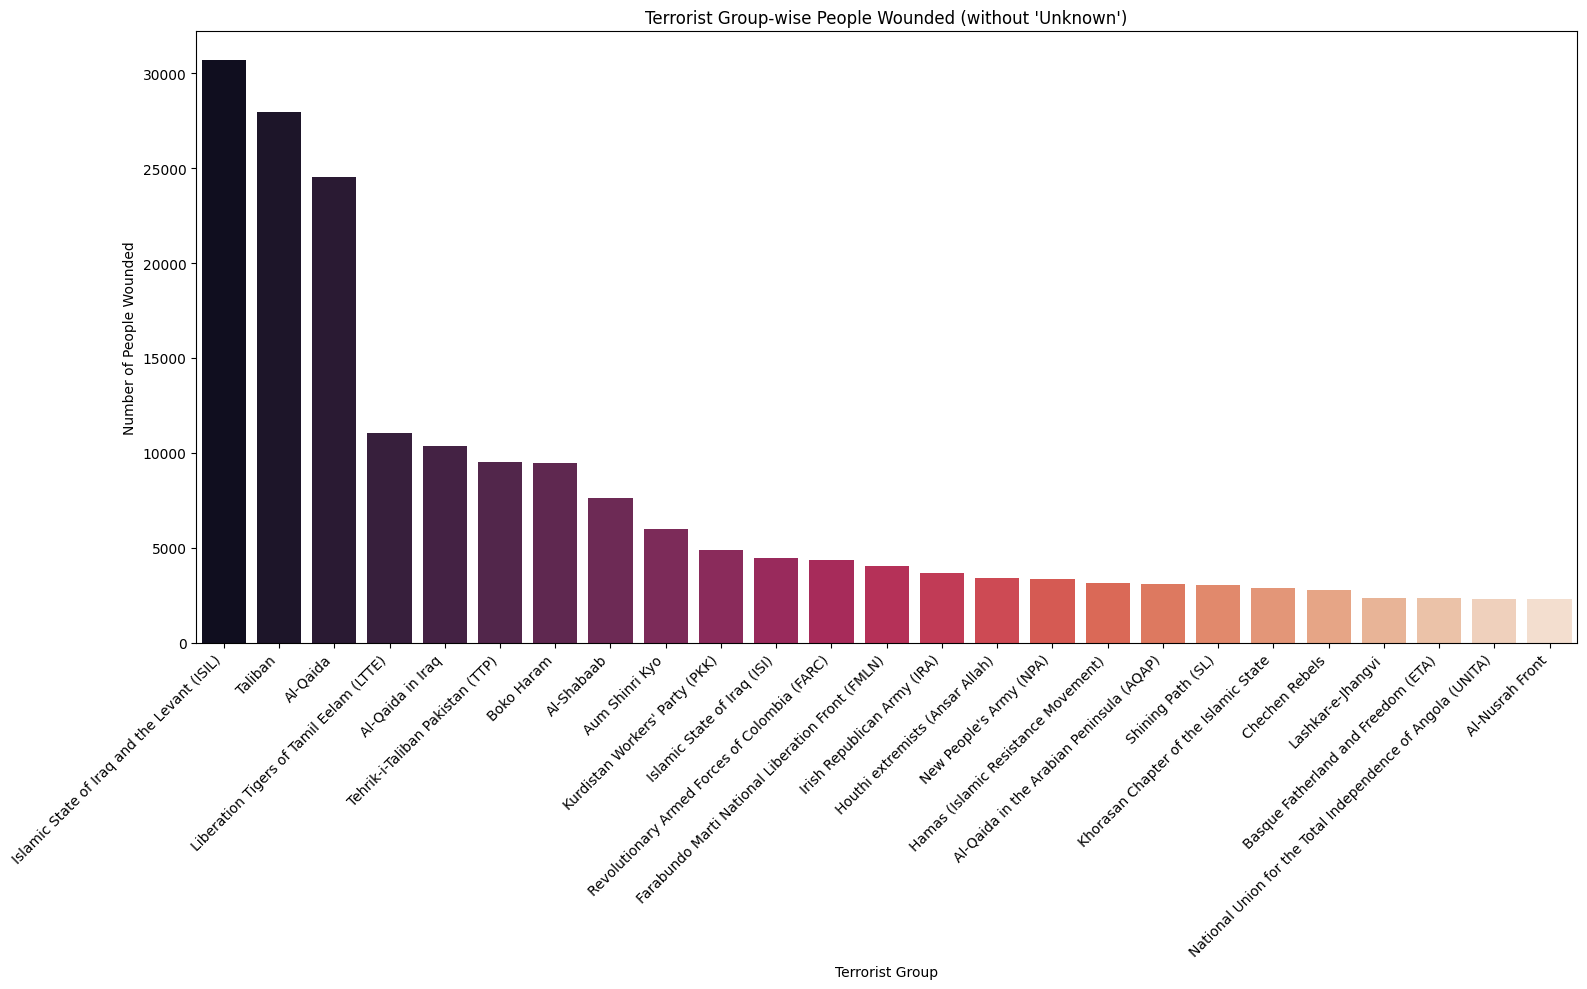

Terrorist Group-wise People Wounded (without 'Unknown'):
Min People Wounded: 1 May - 0.0 people wounded
Max People Wounded: Islamic State of Iraq and the Levant (ISIL) - 30672.0 people wounded



In [108]:
# Filter out rows where the 'Group' is 'Unknown'
terror_filtered_groups = terror[terror['Group'] != 'Unknown']

# Group-wise analysis of people wounded without 'Unknown' groups
group_stats_filtered_wounded = terror_filtered_groups.groupby('Group')['Wounded'].sum().reset_index()

# Plotting terrorist group-wise people wounded without 'Unknown'
plt.figure(figsize=(16, 10))
sns.barplot(x='Group', y='Wounded', data=group_stats_filtered_wounded.sort_values(by='Wounded', ascending=False).head(25), palette='rocket')
plt.title('Terrorist Group-wise People Wounded (without \'Unknown\')')
plt.xlabel('Terrorist Group')
plt.ylabel('Number of People Wounded')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Print min and max values for terrorist group-wise people wounded without 'Unknown'
min_wounded_group_filtered = group_stats_filtered_wounded.loc[group_stats_filtered_wounded['Wounded'].idxmin()]
max_wounded_group_filtered = group_stats_filtered_wounded.loc[group_stats_filtered_wounded['Wounded'].idxmax()]
print(f"Terrorist Group-wise People Wounded (without 'Unknown'):")
print(f"Min People Wounded: {min_wounded_group_filtered['Group']} - {min_wounded_group_filtered['Wounded']} people wounded")
print(f"Max People Wounded: {max_wounded_group_filtered['Group']} - {max_wounded_group_filtered['Wounded']} people wounded\n")


#### Group-Wise CASUALTY

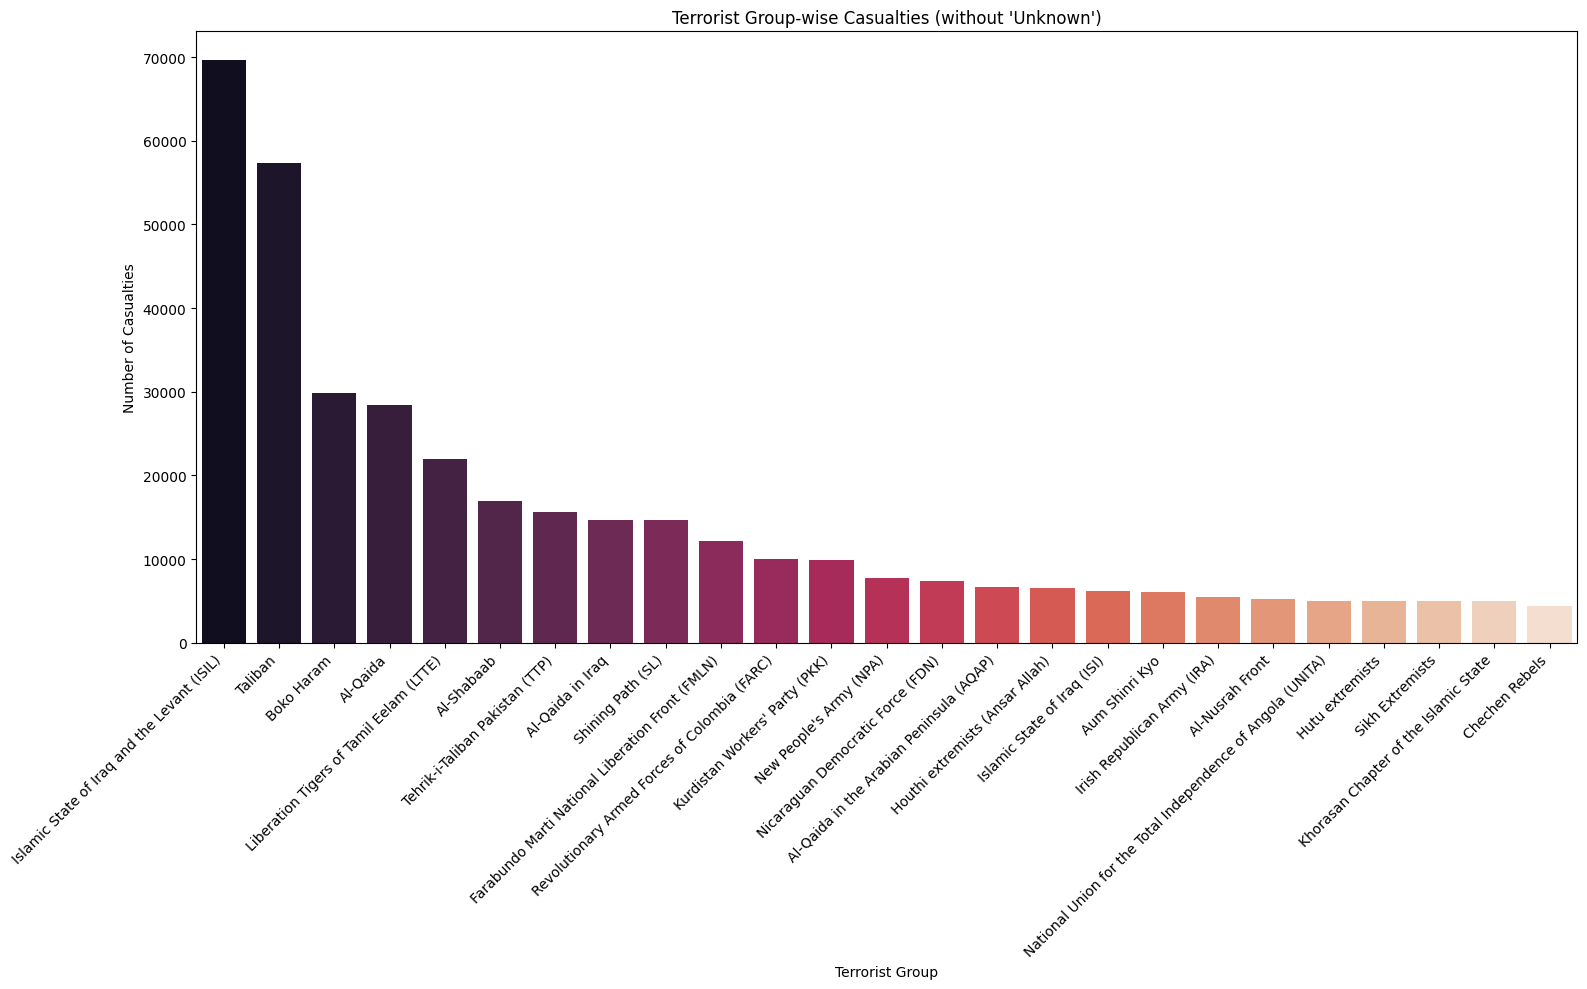

Terrorist Group-wise Casualties (without 'Unknown'):
Min Casualties: 14 K Triad - 0.0 casualties
Max Casualties: Islamic State of Iraq and the Levant (ISIL) - 69595.0 casualties



In [109]:
# Filter out rows where the 'Group' is 'Unknown'
terror_filtered_groups = terror[terror['Group'] != 'Unknown']

# Group-wise analysis of casualties without 'Unknown' groups
group_stats_filtered_casualty = terror_filtered_groups.groupby('Group')['Casualty'].sum().reset_index()

# Plotting terrorist group-wise casualties without 'Unknown'
plt.figure(figsize=(16, 10))
sns.barplot(x='Group', y='Casualty', data=group_stats_filtered_casualty.sort_values(by='Casualty', ascending=False).head(25), palette='rocket')
plt.title('Terrorist Group-wise Casualties (without \'Unknown\')')
plt.xlabel('Terrorist Group')
plt.ylabel('Number of Casualties')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Print min and max values for terrorist group-wise casualties without 'Unknown'
min_casualty_group_filtered = group_stats_filtered_casualty.loc[group_stats_filtered_casualty['Casualty'].idxmin()]
max_casualty_group_filtered = group_stats_filtered_casualty.loc[group_stats_filtered_casualty['Casualty'].idxmax()]
print(f"Terrorist Group-wise Casualties (without 'Unknown'):")
print(f"Min Casualties: {min_casualty_group_filtered['Group']} - {min_casualty_group_filtered['Casualty']} casualties")
print(f"Max Casualties: {max_casualty_group_filtered['Group']} - {max_casualty_group_filtered['Casualty']} casualties\n")


### *6. Weapon Types:*
   - Explore the types of weapons used in terrorist attacks.
   - Identify trends in the use of specific weapon categories.

In [110]:
# Weapon-wise analysis
weapon_stats = terror.groupby('Weapon_type').agg({
    'Year': 'count',
    'Killed': 'sum',
    'Wounded': 'sum',
    'Casualty': 'sum'
}).reset_index()

# Print the top 25 weapon types by the number of attacks
top_weapon_attacks = weapon_stats.sort_values(by='Year', ascending=False).head(25)
print("Top 25 weapon types by the number of attacks:")
print(top_weapon_attacks[['Weapon_type', 'Year']])

# Print only the top 25 weapon type names by the number of attacks
top_weapon_attacks = weapon_stats.sort_values(by='Year', ascending=False).head(25)
print("Top 25 weapon types by the number of attacks:")
print(top_weapon_attacks['Weapon_type'].tolist())

Top 25 weapon types by the number of attacks:
                                          Weapon_type   Year
2                                          Explosives  92426
4                                            Firearms  58524
10                                            Unknown  15157
5                                          Incendiary  11135
6                                               Melee   3655
1                                            Chemical    321
9                                  Sabotage Equipment    141
11  Vehicle (not to include vehicle-borne explosiv...    136
7                                               Other    114
0                                          Biological     35
3                                        Fake Weapons     33
8                                        Radiological     14
Top 25 weapon types by the number of attacks:
['Explosives', 'Firearms', 'Unknown', 'Incendiary', 'Melee', 'Chemical', 'Sabotage Equipment', 'Vehicle (not to inc

#### Weapon-Wise Yearly ATTACKS

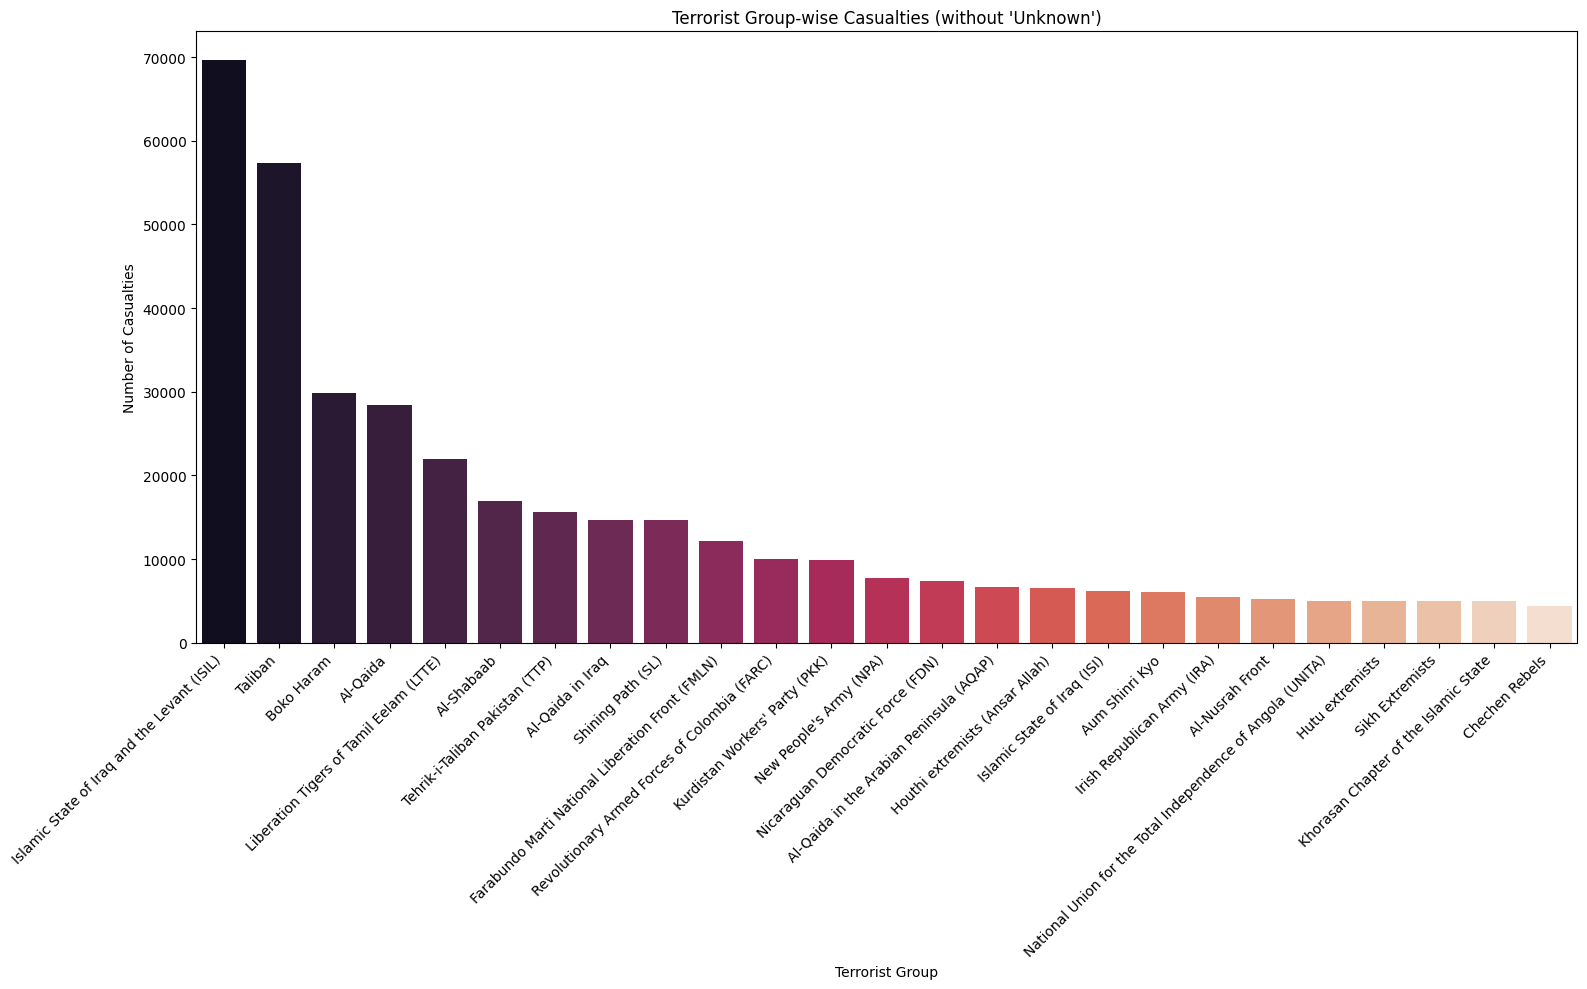

Terrorist Group-wise Casualties (without 'Unknown'):
Min Casualties: 14 K Triad - 0.0 casualties
Max Casualties: Islamic State of Iraq and the Levant (ISIL) - 69595.0 casualties



In [111]:
# Filter out rows where the 'Group' is 'Unknown'
terror_filtered_groups = terror[terror['Group'] != 'Unknown']

# Group-wise analysis of casualties without 'Unknown' groups
group_stats_filtered_casualty = terror_filtered_groups.groupby('Group')['Casualty'].sum().reset_index()

# Plotting terrorist group-wise casualties without 'Unknown'
plt.figure(figsize=(16, 10))
sns.barplot(x='Group', y='Casualty', data=group_stats_filtered_casualty.sort_values(by='Casualty', ascending=False).head(25), palette='rocket')
plt.title('Terrorist Group-wise Casualties (without \'Unknown\')')
plt.xlabel('Terrorist Group')
plt.ylabel('Number of Casualties')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Print min and max values for terrorist group-wise casualties without 'Unknown'
min_casualty_group_filtered = group_stats_filtered_casualty.loc[group_stats_filtered_casualty['Casualty'].idxmin()]
max_casualty_group_filtered = group_stats_filtered_casualty.loc[group_stats_filtered_casualty['Casualty'].idxmax()]
print(f"Terrorist Group-wise Casualties (without 'Unknown'):")
print(f"Min Casualties: {min_casualty_group_filtered['Group']} - {min_casualty_group_filtered['Casualty']} casualties")
print(f"Max Casualties: {max_casualty_group_filtered['Group']} - {max_casualty_group_filtered['Casualty']} casualties\n")


#### Weapon-Wise People KILLED

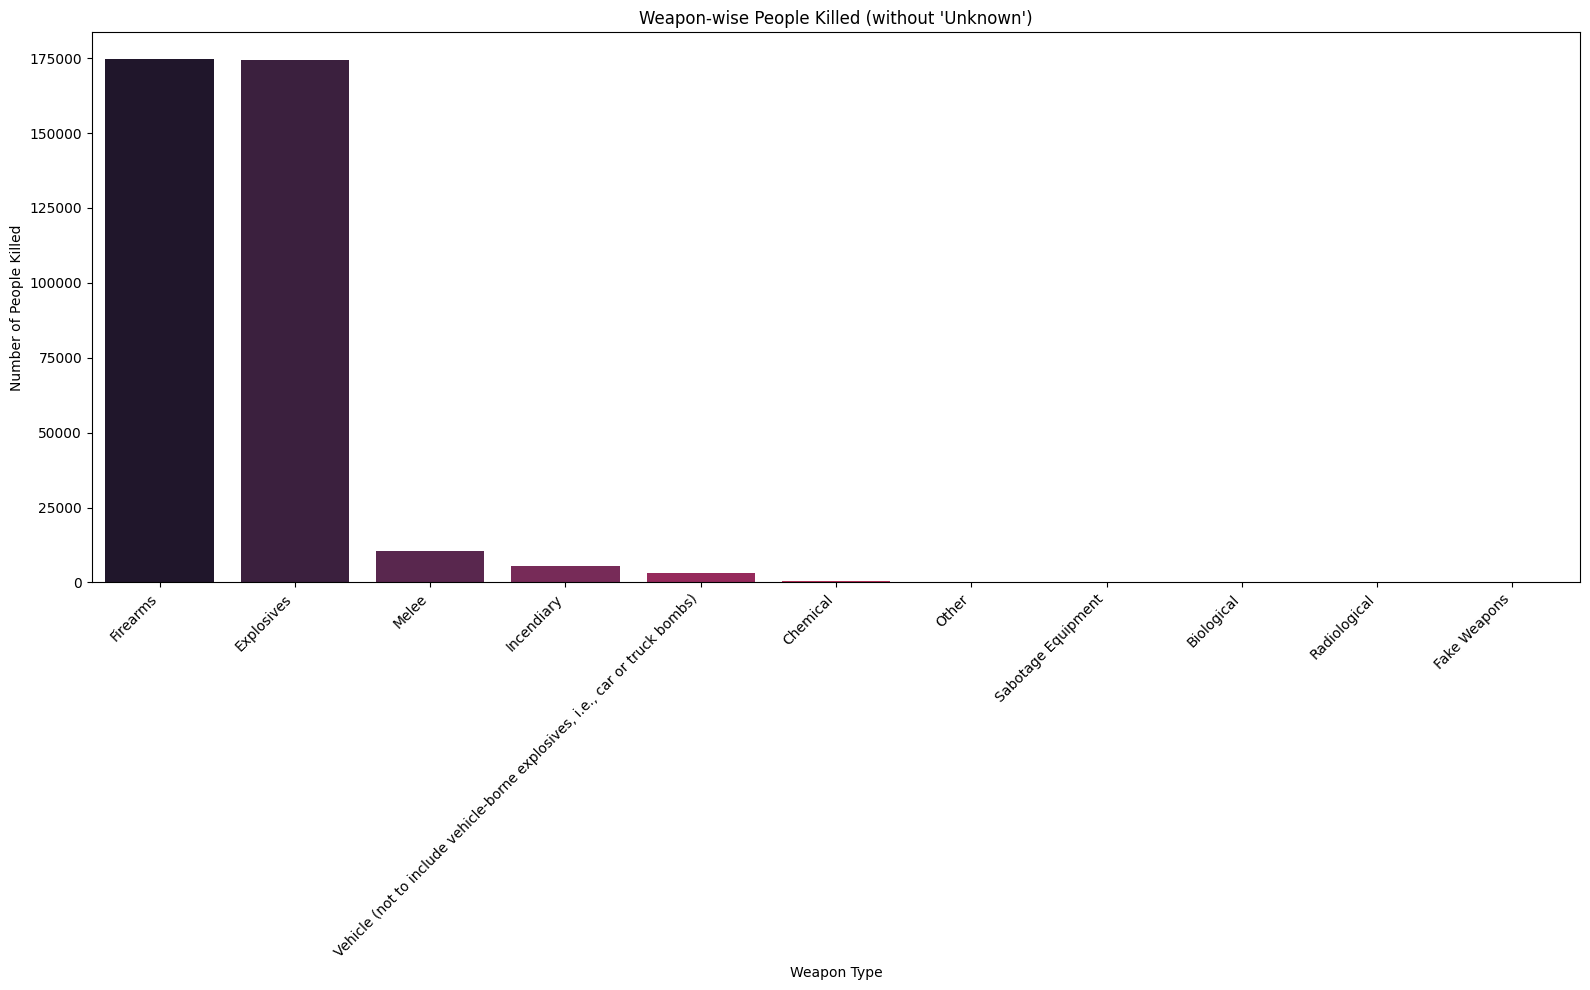

Weapon-wise People Killed (without 'Unknown'):
Min People Killed: Fake Weapons - 1.0 people killed
Max People Killed: Firearms - 174894.0 people killed



In [112]:
# Filter out rows where the 'Weapon_type' is 'Unknown'
weapon_stats_filtered_killed = weapon_stats[weapon_stats['Weapon_type'] != 'Unknown']

# Plotting weapon-wise people killed without 'Unknown'
plt.figure(figsize=(16, 10))
sns.barplot(x='Weapon_type', y='Killed', data=weapon_stats_filtered_killed.sort_values(by='Killed', ascending=False).head(25), palette='rocket')
plt.title('Weapon-wise People Killed (without \'Unknown\')')
plt.xlabel('Weapon Type')
plt.ylabel('Number of People Killed')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Print min and max values for weapon-wise people killed without 'Unknown'
min_killed_weapon_filtered = weapon_stats_filtered_killed.loc[weapon_stats_filtered_killed['Killed'].idxmin()]
max_killed_weapon_filtered = weapon_stats_filtered_killed.loc[weapon_stats_filtered_killed['Killed'].idxmax()]
print(f"Weapon-wise People Killed (without 'Unknown'):")
print(f"Min People Killed: {min_killed_weapon_filtered['Weapon_type']} - {min_killed_weapon_filtered['Killed']} people killed")
print(f"Max People Killed: {max_killed_weapon_filtered['Weapon_type']} - {max_killed_weapon_filtered['Killed']} people killed\n")


#### Weapon-Wise People WOUNDED

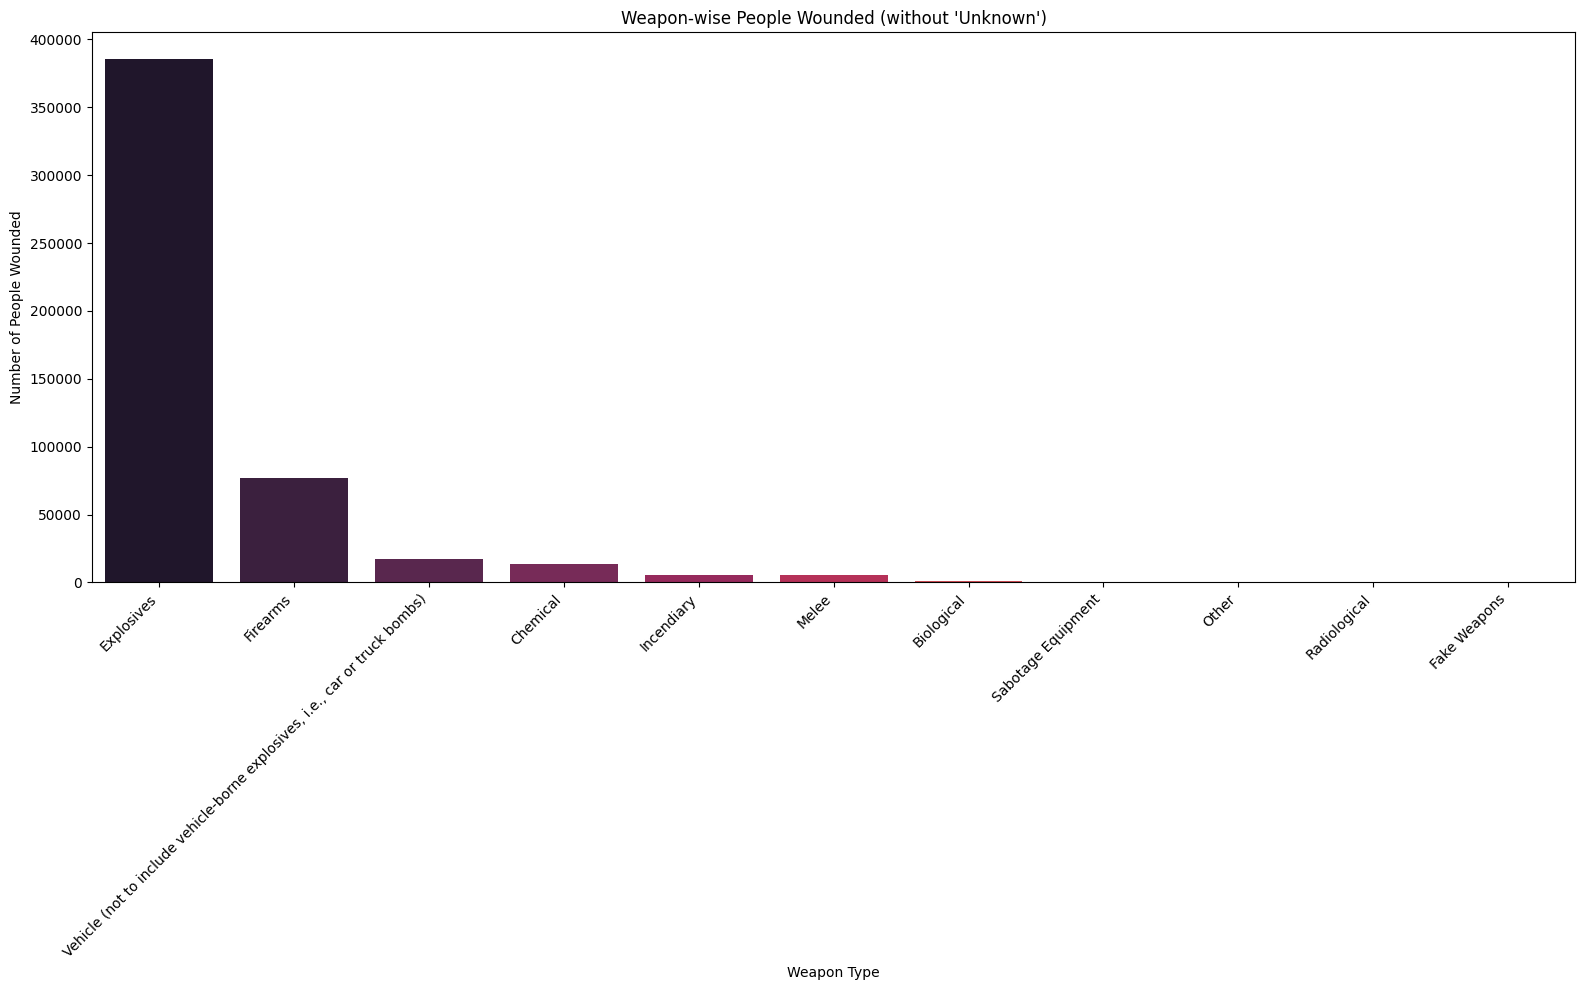

Weapon-wise People Wounded (without 'Unknown'):
Min People Wounded: Fake Weapons - 0.0 people wounded
Max People Wounded: Explosives - 385904.0 people wounded



In [113]:
# Filter out rows where the 'Weapon_type' is 'Unknown'
weapon_stats_filtered_wounded = weapon_stats[weapon_stats['Weapon_type'] != 'Unknown']

# Plotting weapon-wise people wounded without 'Unknown'
plt.figure(figsize=(16, 10))
sns.barplot(x='Weapon_type', y='Wounded', data=weapon_stats_filtered_wounded.sort_values(by='Wounded', ascending=False).head(25), palette='rocket')
plt.title('Weapon-wise People Wounded (without \'Unknown\')')
plt.xlabel('Weapon Type')
plt.ylabel('Number of People Wounded')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Print min and max values for weapon-wise people wounded without 'Unknown'
min_wounded_weapon_filtered = weapon_stats_filtered_wounded.loc[weapon_stats_filtered_wounded['Wounded'].idxmin()]
max_wounded_weapon_filtered = weapon_stats_filtered_wounded.loc[weapon_stats_filtered_wounded['Wounded'].idxmax()]
print(f"Weapon-wise People Wounded (without 'Unknown'):")
print(f"Min People Wounded: {min_wounded_weapon_filtered['Weapon_type']} - {min_wounded_weapon_filtered['Wounded']} people wounded")
print(f"Max People Wounded: {max_wounded_weapon_filtered['Weapon_type']} - {max_wounded_weapon_filtered['Wounded']} people wounded\n")


#### Weapon-Wise CASUALTY

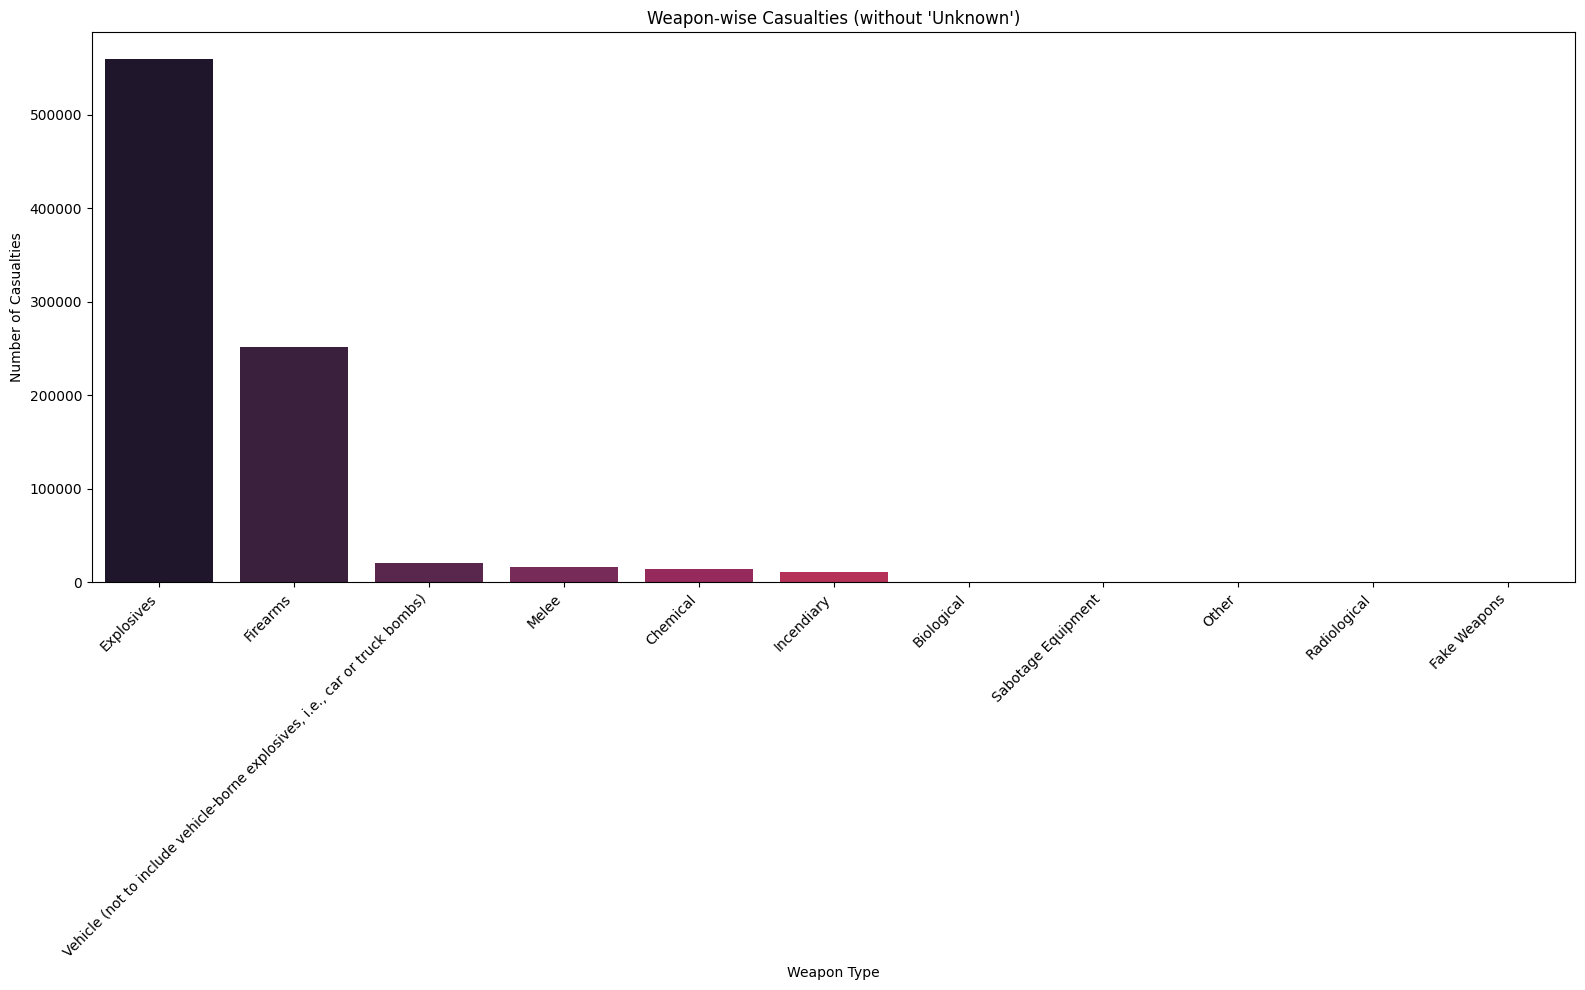

Weapon-wise Casualties (without 'Unknown'):
Min Casualties: Fake Weapons - 1.0 casualties
Max Casualties: Explosives - 560181.0 casualties


In [114]:
# Filter out rows where the 'Weapon_type' is 'Unknown'
weapon_stats_filtered_casualty = weapon_stats[weapon_stats['Weapon_type'] != 'Unknown']

# Plotting weapon-wise casualties without 'Unknown'
plt.figure(figsize=(16, 10))
sns.barplot(x='Weapon_type', y='Casualty', data=weapon_stats_filtered_casualty.sort_values(by='Casualty', ascending=False).head(25), palette='rocket')
plt.title('Weapon-wise Casualties (without \'Unknown\')')
plt.xlabel('Weapon Type')
plt.ylabel('Number of Casualties')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Print min and max values for weapon-wise casualties without 'Unknown'
min_casualty_weapon_filtered = weapon_stats_filtered_casualty.loc[weapon_stats_filtered_casualty['Casualty'].idxmin()]
max_casualty_weapon_filtered = weapon_stats_filtered_casualty.loc[weapon_stats_filtered_casualty['Casualty'].idxmax()]
print(f"Weapon-wise Casualties (without 'Unknown'):")
print(f"Min Casualties: {min_casualty_weapon_filtered['Weapon_type']} - {min_casualty_weapon_filtered['Casualty']} casualties")
print(f"Max Casualties: {max_casualty_weapon_filtered['Weapon_type']} - {max_casualty_weapon_filtered['Casualty']} casualties")


### *7. Target-Wise Analysis*

#### Target-Wise Yearly Analysis

Top 25 target types by the number of attacks:
                       Target_type   Year
13     Private Citizens & Property  43511
9                         Military  27984
12                          Police  24506
6             Government (General)  21283
2                         Business  20669
18                  Transportation   6799
20                       Utilities   6023
19                         Unknown   5898
14  Religious Figures/Institutions   4440
3          Educational Institution   4322
5          Government (Diplomatic)   3573
16    Terrorists/Non-State Militia   3039
7              Journalists & Media   2948
21         Violent Political Party   1866
1              Airports & Aircraft   1343
15               Telecommunication   1009
10                             NGO    970
17                        Tourists    440
8                         Maritime    351
4             Food or Water Supply    317
0                 Abortion Related    263
11                           O

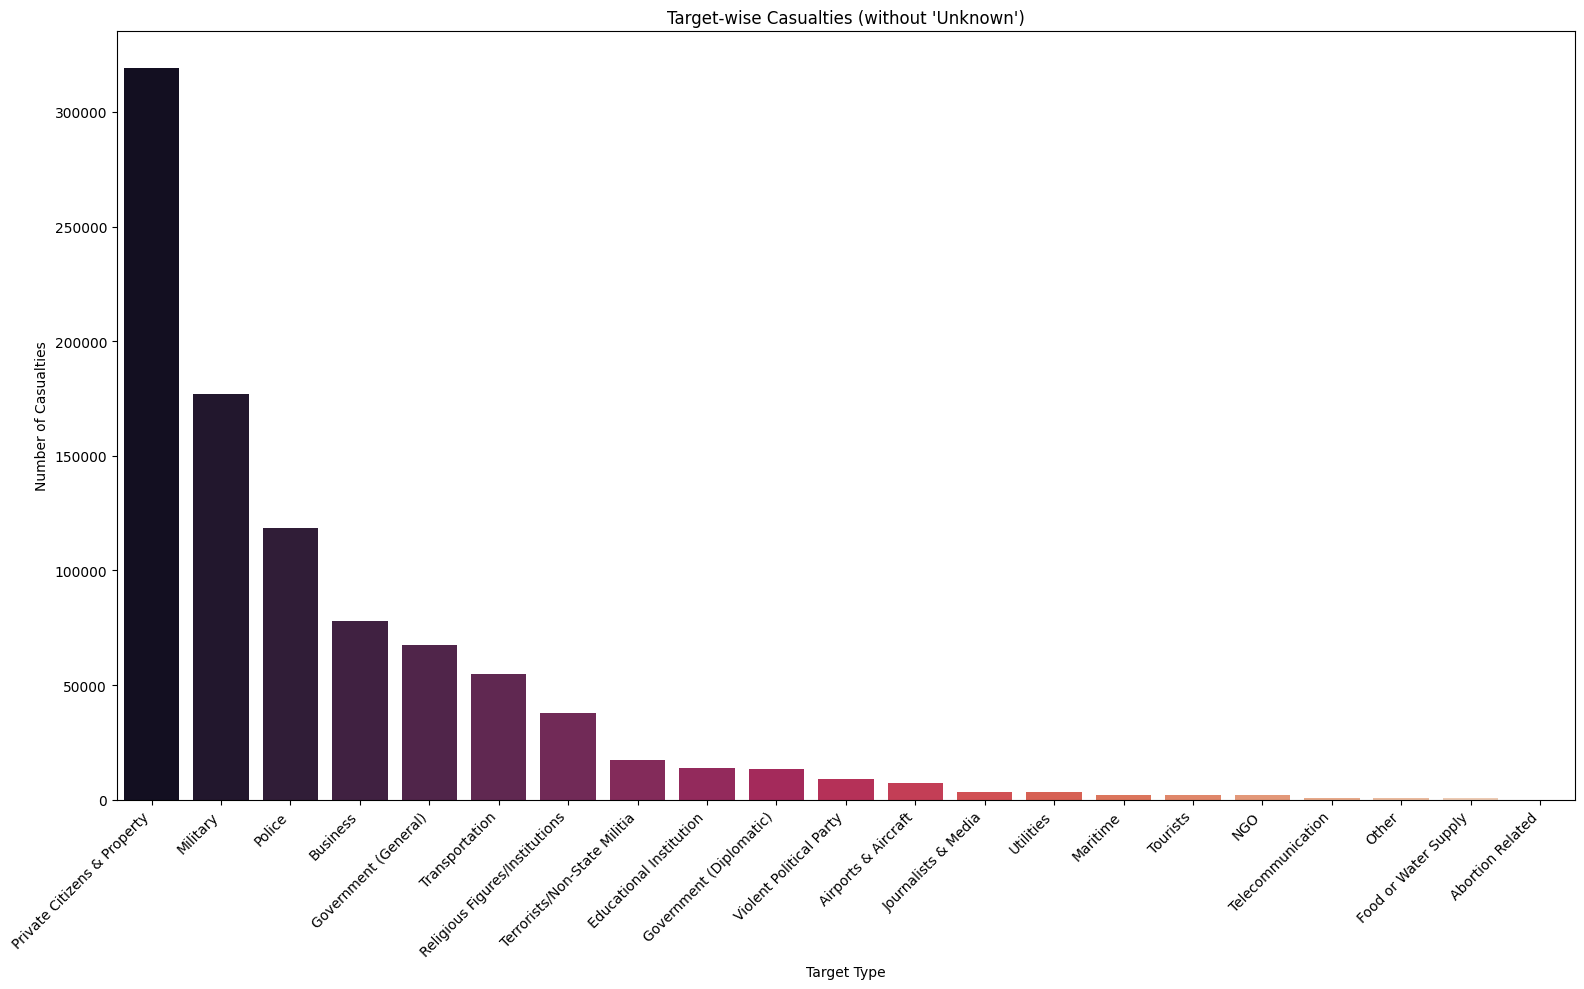

Target-wise Casualties (without 'Unknown'):
Min Casualties: Abortion Related - 56.0 casualties
Max Casualties: Private Citizens & Property - 319176.0 casualties



In [119]:
# Target-wise analysis
target_stats = terror.groupby('Target_type').agg({
    'Year': 'count',
    'Killed': 'sum',
    'Wounded': 'sum',
    'Casualty': 'sum'
}).reset_index()

# Print the top 25 target types by the number of attacks
top_target_attacks = target_stats.sort_values(by='Year', ascending=False).head(25)
print("Top 25 target types by the number of attacks:")
print(top_target_attacks[['Target_type', 'Year']])

# Print only the top 25 target type names by the number of attacks
top_target_attacks = target_stats.sort_values(by='Year', ascending=False).head(25)
print("Top 25 target types by the number of attacks:")
print(top_target_attacks['Target_type'].tolist())

# Filter out rows where the 'Target_type' is 'Unknown'
terror_filtered_targets = terror[terror['Target_type'] != 'Unknown']

# Group-wise analysis of casualties without 'Unknown' targets
target_stats_filtered_casualty = terror_filtered_targets.groupby('Target_type')['Casualty'].sum().reset_index()

# Plotting target-wise casualties without 'Unknown'
plt.figure(figsize=(16, 10))
sns.barplot(x='Target_type', y='Casualty', data=target_stats_filtered_casualty.sort_values(by='Casualty', ascending=False).head(25), palette='rocket')
plt.title('Target-wise Casualties (without \'Unknown\')')
plt.xlabel('Target Type')
plt.ylabel('Number of Casualties')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Print min and max values for target-wise casualties without 'Unknown'
min_casualty_target_filtered = target_stats_filtered_casualty.loc[target_stats_filtered_casualty['Casualty'].idxmin()]
max_casualty_target_filtered = target_stats_filtered_casualty.loc[target_stats_filtered_casualty['Casualty'].idxmax()]
print(f"Target-wise Casualties (without 'Unknown'):")
print(f"Min Casualties: {min_casualty_target_filtered['Target_type']} - {min_casualty_target_filtered['Casualty']} casualties")
print(f"Max Casualties: {max_casualty_target_filtered['Target_type']} - {max_casualty_target_filtered['Casualty']} casualties\n")



#### Target-Wise People Killed

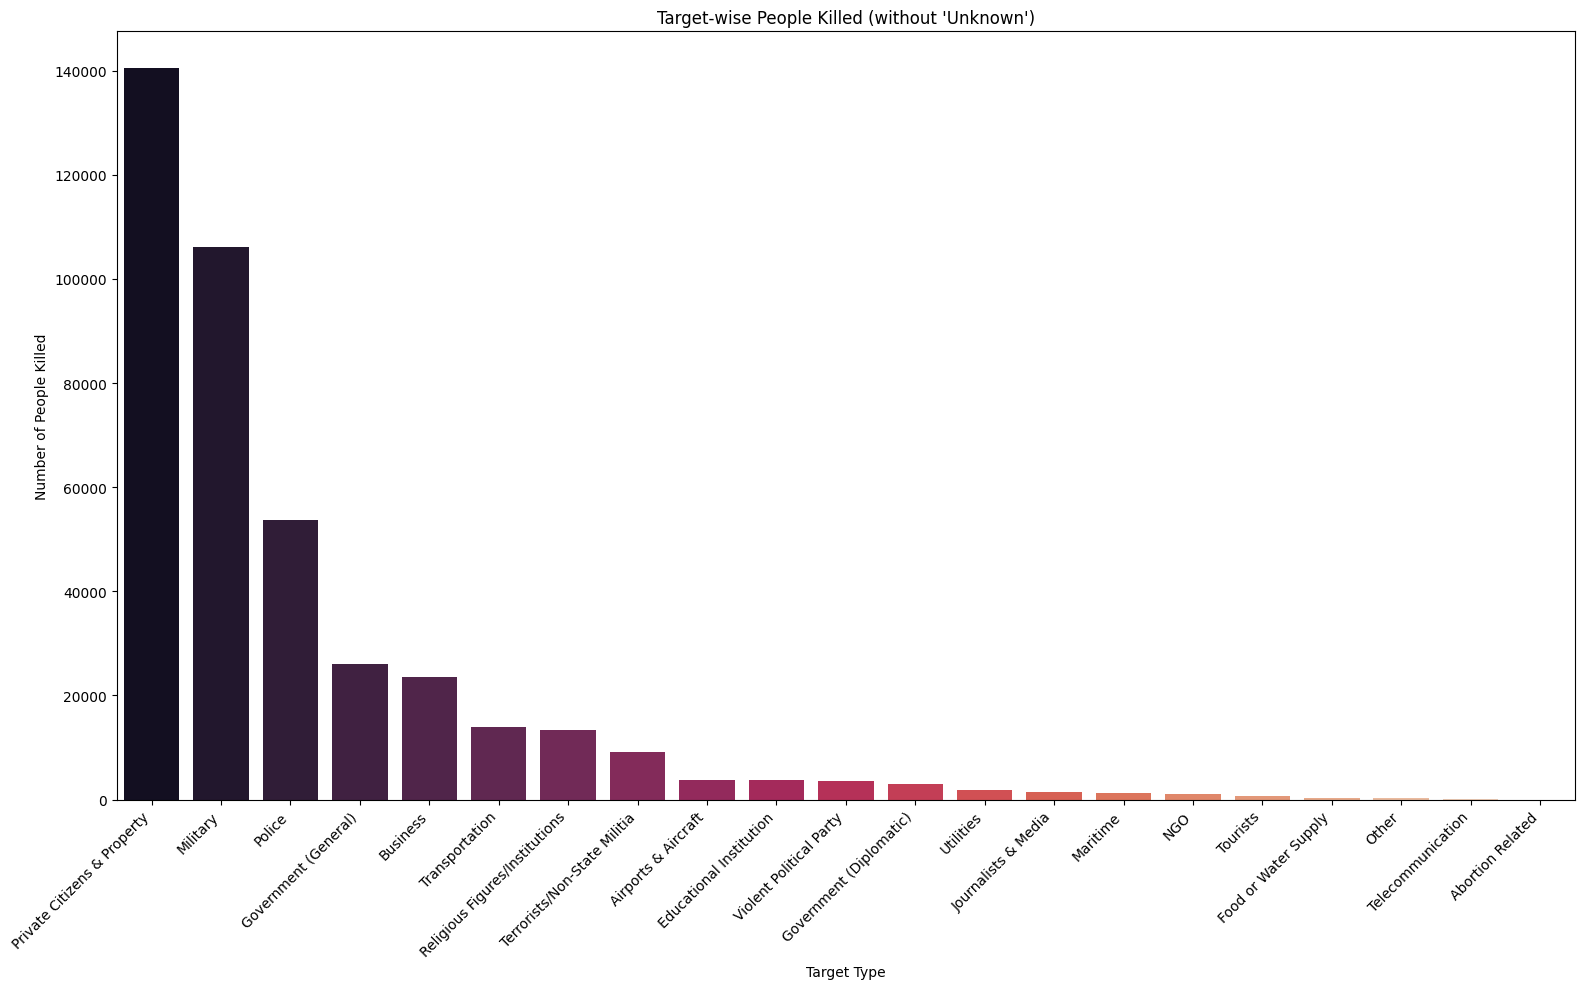

Target-wise People Killed (without 'Unknown'):
Min People Killed: Abortion Related - 10.0 people killed
Max People Killed: Private Citizens & Property - 140504.0 people killed



In [120]:
# Group-wise analysis of killed without 'Unknown' targets
target_stats_filtered_killed = terror_filtered_targets.groupby('Target_type')['Killed'].sum().reset_index()

# Plotting target-wise people killed without 'Unknown'
plt.figure(figsize=(16, 10))
sns.barplot(x='Target_type', y='Killed', data=target_stats_filtered_killed.sort_values(by='Killed', ascending=False).head(25), palette='rocket')
plt.title('Target-wise People Killed (without \'Unknown\')')
plt.xlabel('Target Type')
plt.ylabel('Number of People Killed')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Print min and max values for target-wise people killed without 'Unknown'
min_killed_target_filtered = target_stats_filtered_killed.loc[target_stats_filtered_killed['Killed'].idxmin()]
max_killed_target_filtered = target_stats_filtered_killed.loc[target_stats_filtered_killed['Killed'].idxmax()]
print(f"Target-wise People Killed (without 'Unknown'):")
print(f"Min People Killed: {min_killed_target_filtered['Target_type']} - {min_killed_target_filtered['Killed']} people killed")
print(f"Max People Killed: {max_killed_target_filtered['Target_type']} - {max_killed_target_filtered['Killed']} people killed\n")


#### Target-Wise People Wounded

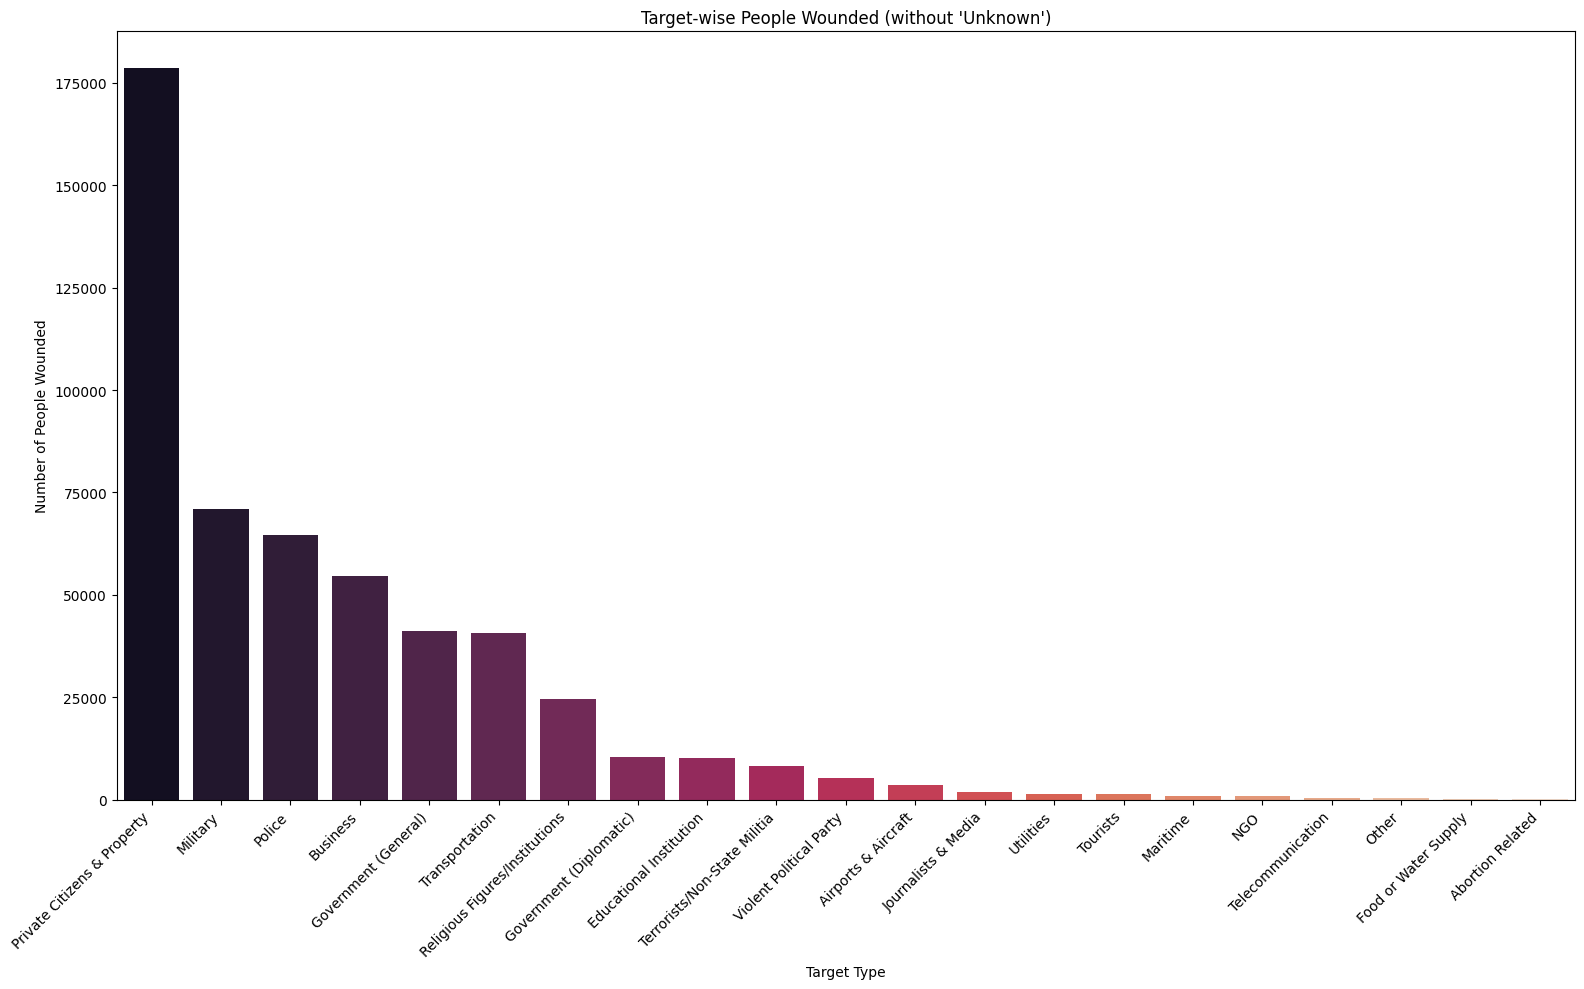

Target-wise People Wounded (without 'Unknown'):
Min People Wounded: Abortion Related - 46.0 people wounded
Max People Wounded: Private Citizens & Property - 178672.0 people wounded



In [121]:
# Group-wise analysis of wounded without 'Unknown' targets
target_stats_filtered_wounded = terror_filtered_targets.groupby('Target_type')['Wounded'].sum().reset_index()

# Plotting target-wise people wounded without 'Unknown'
plt.figure(figsize=(16, 10))
sns.barplot(x='Target_type', y='Wounded', data=target_stats_filtered_wounded.sort_values(by='Wounded', ascending=False).head(25), palette='rocket')
plt.title('Target-wise People Wounded (without \'Unknown\')')
plt.xlabel('Target Type')
plt.ylabel('Number of People Wounded')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Print min and max values for target-wise people wounded without 'Unknown'
min_wounded_target_filtered = target_stats_filtered_wounded.loc[target_stats_filtered_wounded['Wounded'].idxmin()]
max_wounded_target_filtered = target_stats_filtered_wounded.loc[target_stats_filtered_wounded['Wounded'].idxmax()]
print(f"Target-wise People Wounded (without 'Unknown'):")
print(f"Min People Wounded: {min_wounded_target_filtered['Target_type']} - {min_wounded_target_filtered['Wounded']} people wounded")
print(f"Max People Wounded: {max_wounded_target_filtered['Target_type']} - {max_wounded_target_filtered['Wounded']} people wounded\n")


#### Target-Wise Casualty

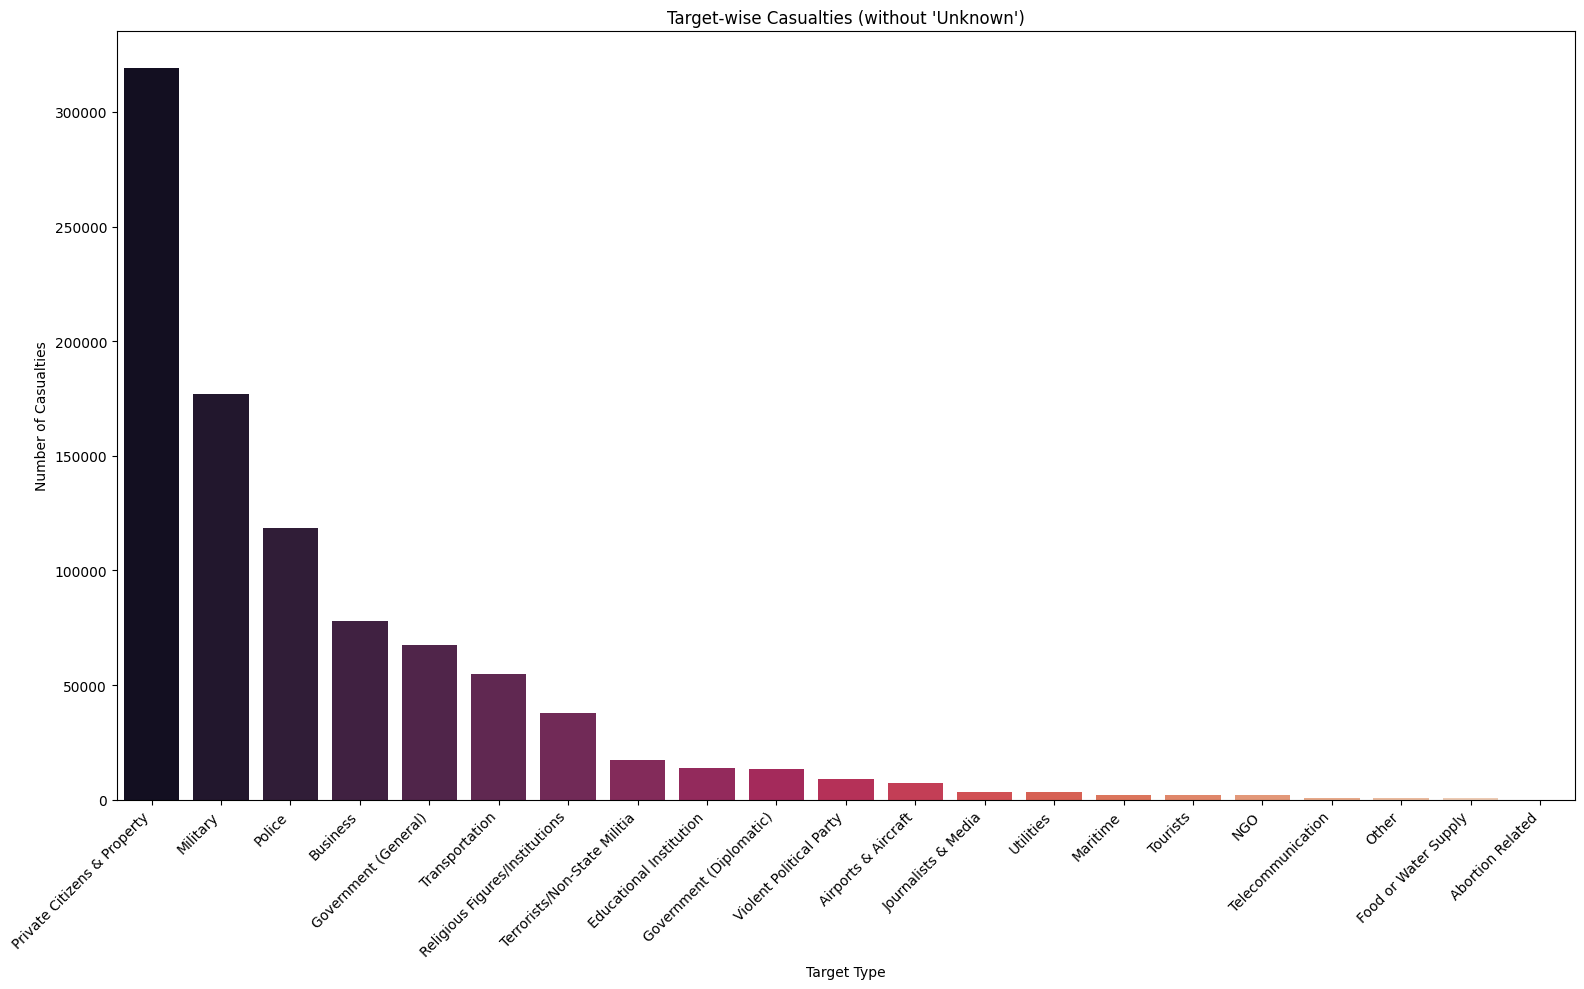

Target-wise Casualties (without 'Unknown'):
Min Casualties: Abortion Related - 56.0 casualties
Max Casualties: Private Citizens & Property - 319176.0 casualties


In [122]:
# Group-wise analysis of casualties without 'Unknown' targets
target_stats_filtered_casualty = terror_filtered_targets.groupby('Target_type')['Casualty'].sum().reset_index()

# Plotting target-wise casualties without 'Unknown'
plt.figure(figsize=(16, 10))
sns.barplot(x='Target_type', y='Casualty', data=target_stats_filtered_casualty.sort_values(by='Casualty', ascending=False).head(25), palette='rocket')
plt.title('Target-wise Casualties (without \'Unknown\')')
plt.xlabel('Target Type')
plt.ylabel('Number of Casualties')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Print min and max values for target-wise casualties without 'Unknown'
min_casualty_target_filtered = target_stats_filtered_casualty.loc[target_stats_filtered_casualty['Casualty'].idxmin()]
max_casualty_target_filtered = target_stats_filtered_casualty.loc[target_stats_filtered_casualty['Casualty'].idxmax()]
print(f"Target-wise Casualties (without 'Unknown'):")
print(f"Min Casualties: {min_casualty_target_filtered['Target_type']} - {min_casualty_target_filtered['Casualty']} casualties")
print(f"Max Casualties: {max_casualty_target_filtered['Target_type']} - {max_casualty_target_filtered['Casualty']} casualties")

## FINAL OBSERVATIONS

1. Temporal Analysis: Year-wise Description on Terrorism Attacks and Casualty

Yearly Attacks
- Min Attacks: 1971 - 471 attacks
- Max Attacks: 2014 - 16903 attacks

People killed
- Min People Killed: 1971.0 - 173.0 people killed
- Max People Killed: 2014.0 - 44490.0 people killed

People Wounded
- Min People Wounded: 1971.0 - 82.0 people wounded
- Max People Wounded: 2015.0 - 44043.0 people wounded

Casualties
- Min Casualties: 1971.0 - 255.0 casualties
- Max Casualties: 2014.0 - 85618.0 casualties

2. Geospatial Distribution: Region-wise Analysis

Region-wise Attacks:
- Min Attacks: Australasia & Oceania - 282 attacks
- Max Attacks: South Asia - 44974 attacks

Region-wise People Killed:
- Min People Killed: Australasia & Oceania - 150.0 people killed
- Max People Killed: South Asia - 101319.0 people killed

Region-wise People Wounded:
- Min People Wounded: Australasia & Oceania - 260.0 people wounded
- Max People Wounded: South Asia - 141360.0 people wounded

Region-wise Casualties:
- Min Casualties: Australasia & Oceania - 410.0 casualties
- Max Casualties: South Asia - 242679.0 casualties

3. Country-Wise Analysis

Country-wise Attacks (Selected Countries):
- Min Attacks: Spain - 3249 attacks
- Max Attacks: Iraq - 24636 attacks

Country-wise People Killed (Selected Countries):
- Min People Killed: Spain - 1288.0 people killed
- Max People Killed: Iraq - 78589.0 people killed

Country-wise People Wounded (Selected Countries):
- Min People Wounded: Peru - 4078.0 people wounded
- Max People Wounded: Iraq - 134690.0 people wounded

Country-wise Casualties (Selected Countries):
- Min Casualties: Spain - 6223.0 casualties
- Max Casualties: Iraq - 213279.0 casualties

4. City-Wise Analysis

City-wise Attacks (without 'Unknown'):
- Min Attacks: 62 miles South of Dushanbe - 1 attacks
- Max Attacks: Baghdad - 7589 attacks

City-wise People Killed (without 'Unknown'):
- Min People Killed: ANkara - 0.0 people killed
- Max People Killed: Baghdad - 21151.0 people killed

City-wise People Wounded (without 'Unknown'):
- Min People Wounded: 62 miles South of Dushanbe - 0.0 people wounded
- Max People Wounded: Baghdad - 56725.0 people wounded

City-wise Casualties (without 'Unknown'):
- Min Casualties: ANkara - 0.0 casualties
- Max Casualties: Baghdad - 77876.0 casualties

5. Group-Wise Analysis

Terrorist Group-wise Attacks (without 'Unknown'):
- Min Attacks: 14 March Coalition - 1 attacks
- Max Attacks: Taliban - 7478 attacks

Terrorist Group-wise People Killed (without 'Unknown'):
- Min People Killed: 14 K Triad - 0.0 people killed
- Max People Killed: Islamic State of Iraq and the Levant (ISIL) - 38923.0 people killed

Terrorist Group-wise People Wounded (without 'Unknown'):
- Min People Wounded: 1 May - 0.0 people wounded
- Max People Wounded: Islamic State of Iraq and the Levant (ISIL) - 30672.0 people wounded

Terrorist Group-wise Casualties (without 'Unknown'):
- Min Casualties: 14 K Triad - 0.0 casualties
- Max Casualties: Islamic State of Iraq and the Levant (ISIL) - 69595.0 casualties

6. Weapon Types

Terrorist Group-wise Casualties (without 'Unknown'):
Min Casualties: 14 K Triad - 0.0 casualties
Max Casualties: Islamic State of Iraq and the Levant (ISIL) - 69595.0 casualties

Weapon-wise People Killed (without 'Unknown'):
Min People Killed: Fake Weapons - 1.0 people killed
Max People Killed: Firearms - 174894.0 people killed

Weapon-wise People Wounded (without 'Unknown'):
Min People Wounded: Fake Weapons - 0.0 people wounded
Max People Wounded: Explosives - 385904.0 people wounded

Weapon-wise Casualties (without 'Unknown'):
Min Casualties: Fake Weapons - 1.0 casualties
Max Casualties: Explosives - 560181.0 casualties

7. Target-Wise Analysis

Target-wise People Killed (without 'Unknown'):
- Min People Killed: Abortion Related - 10.0 people killed
- Max People Killed: Private Citizens & Property - 140504.0 people killed

Target-wise People Wounded (without 'Unknown'):
- Min People Wounded: Abortion Related - 46.0 people wounded
- Max People Wounded: Private Citizens & Property - 178672.0 people wounded

Target-wise Casualties (without 'Unknown'):
- Min Casualties: Abortion Related - 56.0 casualties
- Max Casualties: Private Citizens & Property - 319176.0 casualties

### FINAL CONCLUSION


- Most ATTACKING MONTH - MAY
- Most ATTACKING GROUP - TALIBAN
- Most ATTACKING COUNTRY - IRAQ
- Most ATTACKING YEAR - 2014
- ost ATTACKING TYPE - BOMBING/EXPLOSION